# Other Datasets

This notebook is a quick look at other dataset provided with other information about clients.

For Datasets:
1. Features in each dataset,
2. Duplicated clients,
3. Missing values,
4. Duplicated rows,
5. Distribution of each feature (Numeric and Categorical features).

Merging Datasets:
1. Merging bureau and bureau balance by sk_id_bureau
2. Merging the others sk_id_curr
3. Turning to file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from scipy.stats import mode
import math
import re
import gc
from matplotlib.ticker import ScalarFormatter
from statsmodels.stats.proportion import proportion_confint
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from pandas.api.types import CategoricalDtype
import warnings
from functions_eda import (
    show_head_and_info,
    count_clients_with_multiple_records,
    missing_value_summary,
    fill_missing_values,
    print_unique_counts,
    value_counts_rounded,
    plot_numeric_distribution,
    plot_categorical_distribution,
    detect_outliers,
    remove_outliers_by_std,
    convert_days_to_months,
    mode_agg,
    aggregate_bureau_with_balance,
    aggregate_datasets,
)

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("max_colwidth", None)

## Bureau Datset

###  1. Features in dataset

In [2]:
bureau_df = pd.read_csv("bureau.csv")
bureau_df.columns = bureau_df.columns.str.strip().str.lower().str.replace(" ", "_")
show_head_and_info(bureau_df)

Data


,sk_id_curr,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN



Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   sk_id_curr              int64  
 1   sk_id_bureau            int64  
 2   credit_active           object 
 3   credit_currency         object 
 4   days_credit             int64  
 5   credit_day_overdue      int64  
 6   days_credit_enddate     float64
 7   days_enddate_fact       float64
 8   amt_credit_max_overdue  float64
 9   cnt_credit_prolong      int64  
 10  amt_credit_sum          float64
 11  amt_credit_sum_debt     float64
 12  amt_credit_sum_limit    float64
 13  amt_credit_sum_overdue  float64
 14  credit_type             object 
 15  days_credit_update      int64  
 16  amt_annuity             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


We have 1 716 428 observations and 17 features.

### 2. Duplicated clients

In [3]:
count_clients_with_multiple_records(bureau_df)

264291

### 3. Missing Values

In [4]:
missing_value_summary(bureau_df)

,Missing Count,Missing %
amt_annuity,1226791,71.47
amt_credit_max_overdue,1124488,65.51
days_enddate_fact,633653,36.92
amt_credit_sum_limit,591780,34.48
amt_credit_sum_debt,257669,15.01
days_credit_enddate,105553,6.15
amt_credit_sum,13,0.00


In [5]:
bureau_df = fill_missing_values(bureau_df, group_col="sk_id_curr")

missing_value_summary(bureau_df)

,Missing Count,Missing %


### 4. Duplicated Rows

In [6]:
bureau_df.duplicated().sum()

0

### 5. Distribution of each feature

#### 5.1. Numeric Features

In [7]:
bureau_numeric = [
    col
    for col in bureau_df.select_dtypes(include="number").columns
    if col not in ["sk_id_curr", "sk_id_bureau"]
]

##### 5.1.1. Distribution

In [8]:
bureau_df[bureau_numeric].describe().round(2)

,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,days_credit_update,amt_annuity
count,1716428.00,1716428.00,1716428.00,1716428.00,1.716428e+06,1716428.00,1.716428e+06,1.716428e+06,1716428.00,1716428.00,1716428.00,1.716428e+06
mean,-1142.11,0.82,477.77,-978.00,2.604610e+03,0.01,3.549967e+05,1.245848e+05,4708.41,37.91,-593.75,5.895760e+03
std,795.16,36.54,4885.30,643.91,1.779637e+05,0.10,1.149809e+06,6.426652e+05,38800.09,5937.65,720.75,1.768873e+05
min,-2922.00,0.00,-42060.00,-42023.00,0.000000e+00,0.00,0.000000e+00,-4.705600e+06,-586406.12,0.00,-41947.00,0.000000e+00
25%,-1666.00,0.00,-1105.00,-1337.00,0.000000e+00,0.00,5.130000e+04,0.000000e+00,0.00,0.00,-908.00,0.000000e+00
50%,-987.00,0.00,-329.00,-878.00,0.000000e+00,0.00,1.255225e+05,0.000000e+00,0.00,0.00,-395.00,0.000000e+00
75%,-474.00,0.00,439.00,-480.00,0.000000e+00,0.00,3.150000e+05,2.790000e+04,0.00,0.00,-33.00,0.000000e+00
max,0.00,2792.00,31199.00,0.00,1.159872e+08,9.00,5.850000e+08,1.701000e+08,4705600.32,3756681.00,372.00,1.184534e+08


* days_credit: On average, bureau credits were opened around 3 years before the application (mean = -1142). Ranges from around 8 years ago to same day (min = -2922, max = 0).
* credit_day_overdue: Most credits have no overdue (median = 0), but some go up to around 7.6 years late (max = 2792).
* days_credit_enddate: High variability. Some credits end far in the past (min = -42060), some far in future (max = 31199).
* days_enddate_fact: Many credits ended before application (mean ≈ -978), but some just ended (max = 0).
* amt_credit_max_overdue: Most credits have no overdue (75% = 0), but some have extreme values (max ≈ 116M).
* cnt_credit_prolong: Almost all credits were not prolonged (mean ≈ 0, max = 9).
* amt_credit_sum: Average credit amount ~354k, but values range from 0 to 585M.
* amt_credit_sum_debt: Median debt is 0, suggesting many credits are paid, but some are highly indebted (max ≈ 170M).
* amt_credit_sum_limit: Mostly unused (75% = 0), but some credit cards have high limits (max ≈ 4.7M).
* amt_credit_sum_overdue: Usually 0, but some loans are overdue by large sums (max ≈ 3.7M).
* days_credit_update: Credit info is usually updated within last 1.5 years (mean ≈ -594, max = 372).
* amt_annuity: Many entries are 0 (missing or non-installment credit), but some have high annual payments (max ≈ 118M).

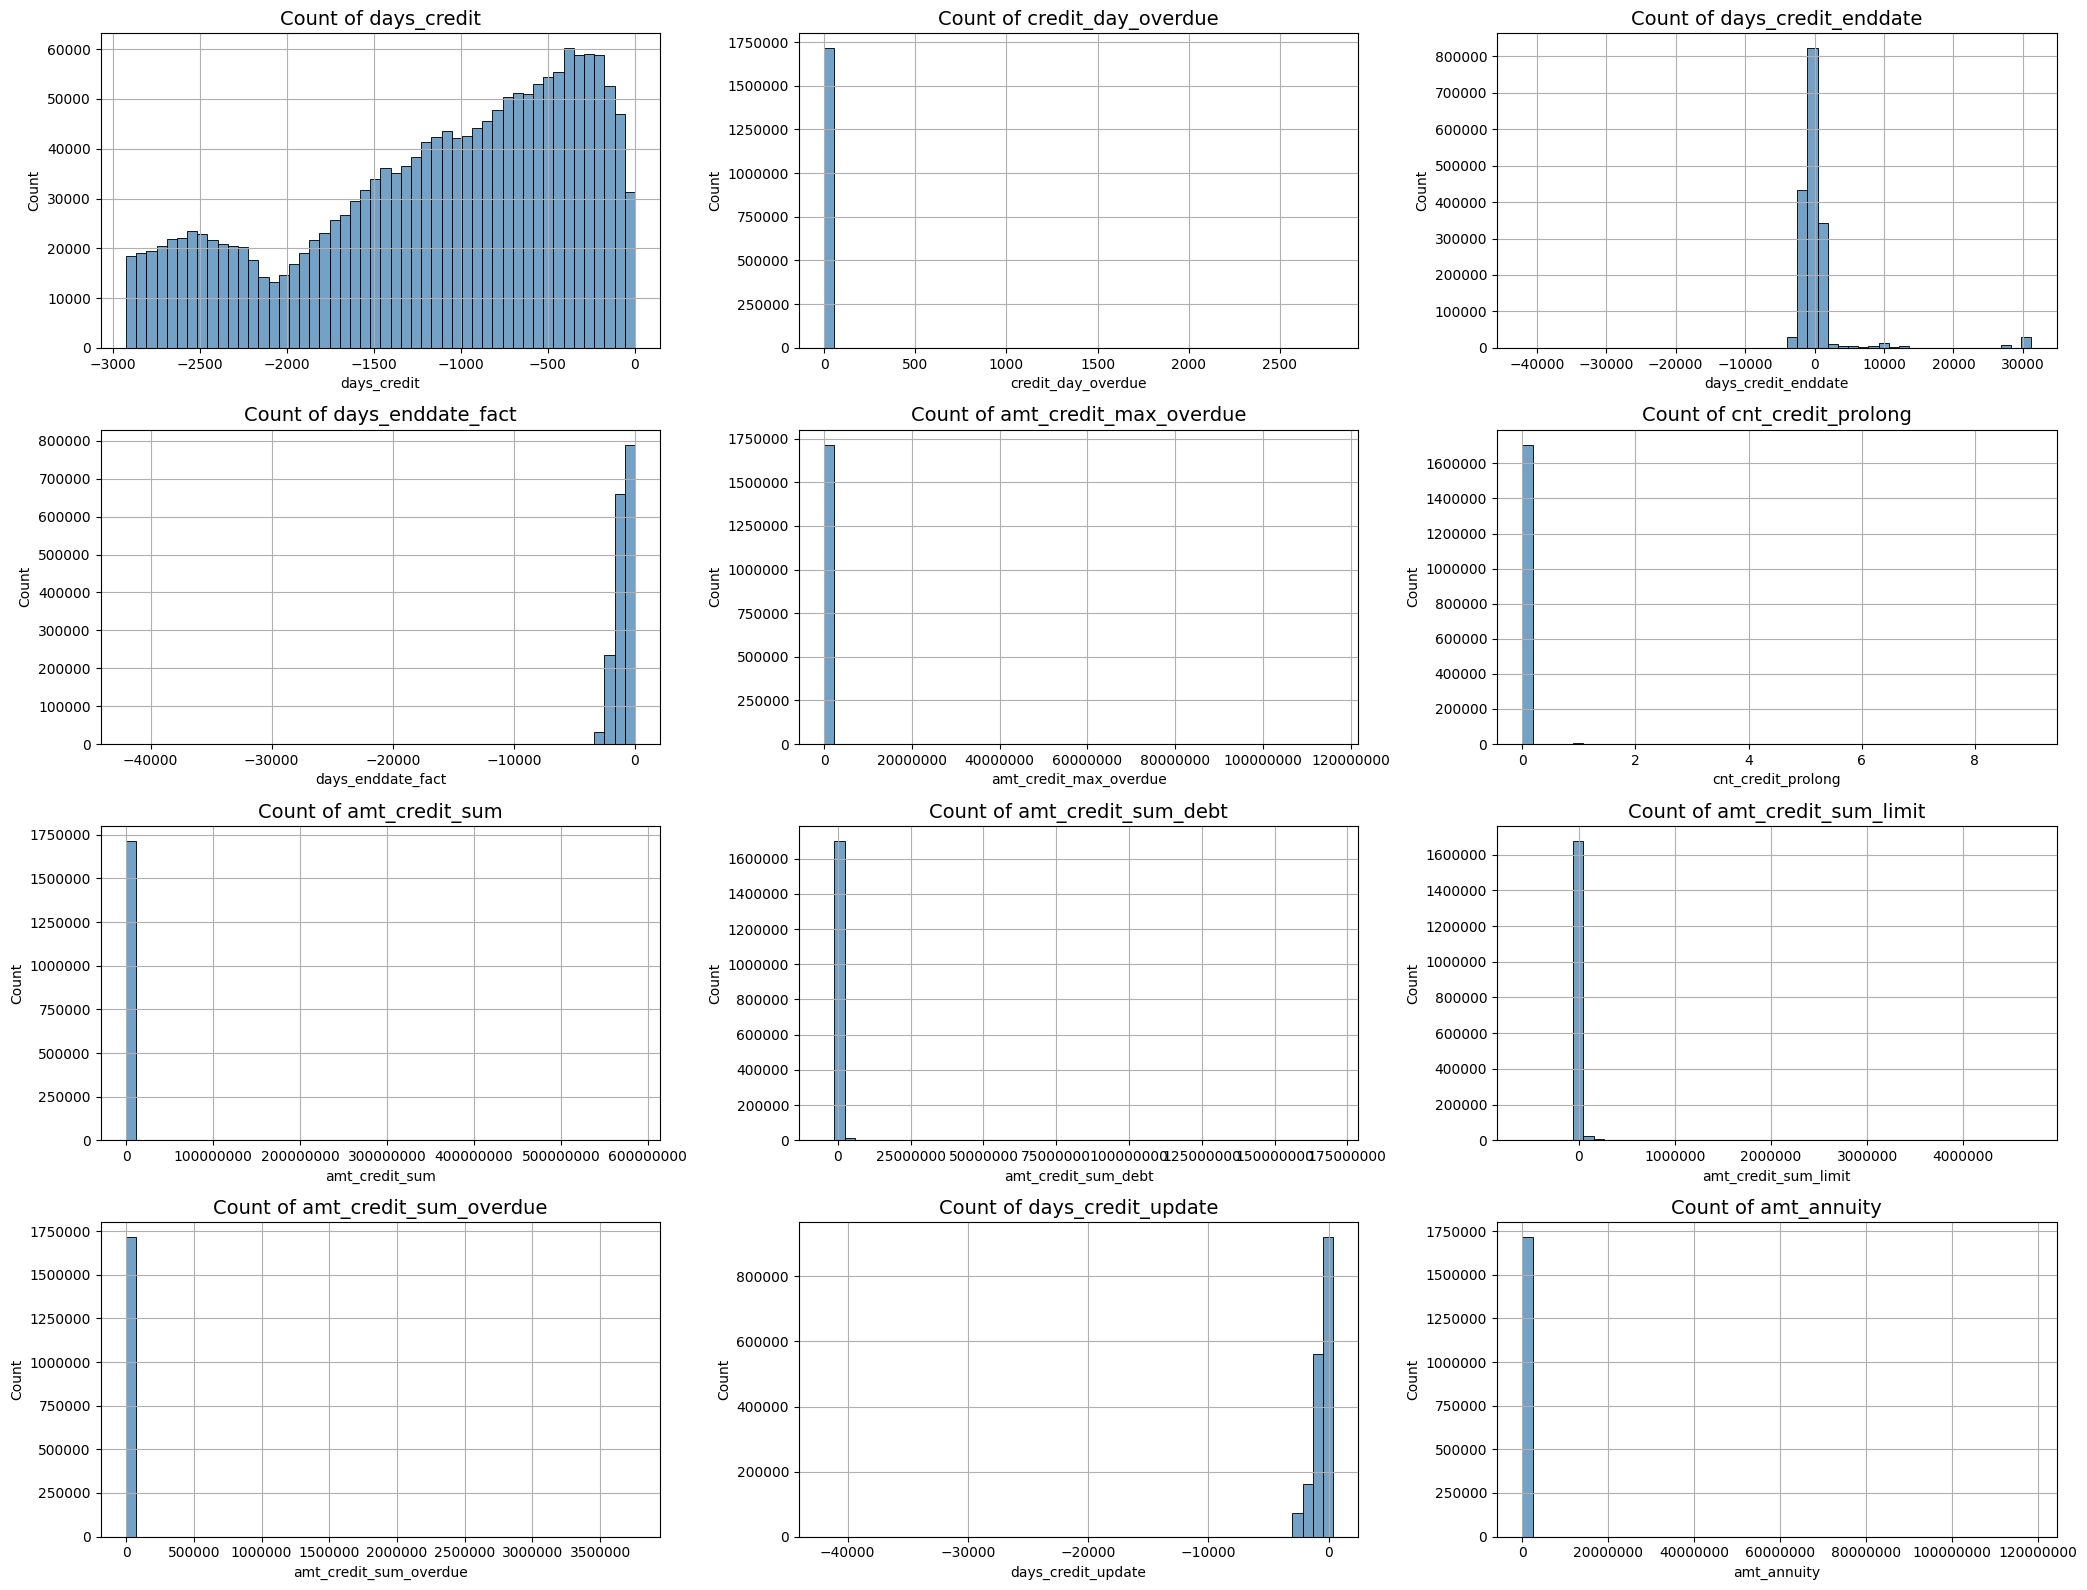

In [9]:
plot_numeric_distribution(bureau_df, bureau_numeric)

Only days credit doesn't have skeweness all others have high outliers that make distribution be right or left skewed.

##### 5.1.2. Outliers

In [10]:
detect_outliers(bureau_df, bureau_numeric)

Outliers detected in 'days_credit': 0
Outliers detected in 'credit_day_overdue': 4217
Outliers detected in 'days_credit_enddate': 82136
Outliers detected in 'days_enddate_fact': 13586
Outliers detected in 'amt_credit_max_overdue': 283062
Outliers detected in 'cnt_credit_prolong': 9114
Outliers detected in 'amt_credit_sum': 188003
Outliers detected in 'amt_credit_sum_debt': 349271
Outliers detected in 'amt_credit_sum_limit': 93254
Outliers detected in 'amt_credit_sum_overdue': 4158
Outliers detected in 'days_credit_update': 63755
Outliers detected in 'amt_annuity': 354197


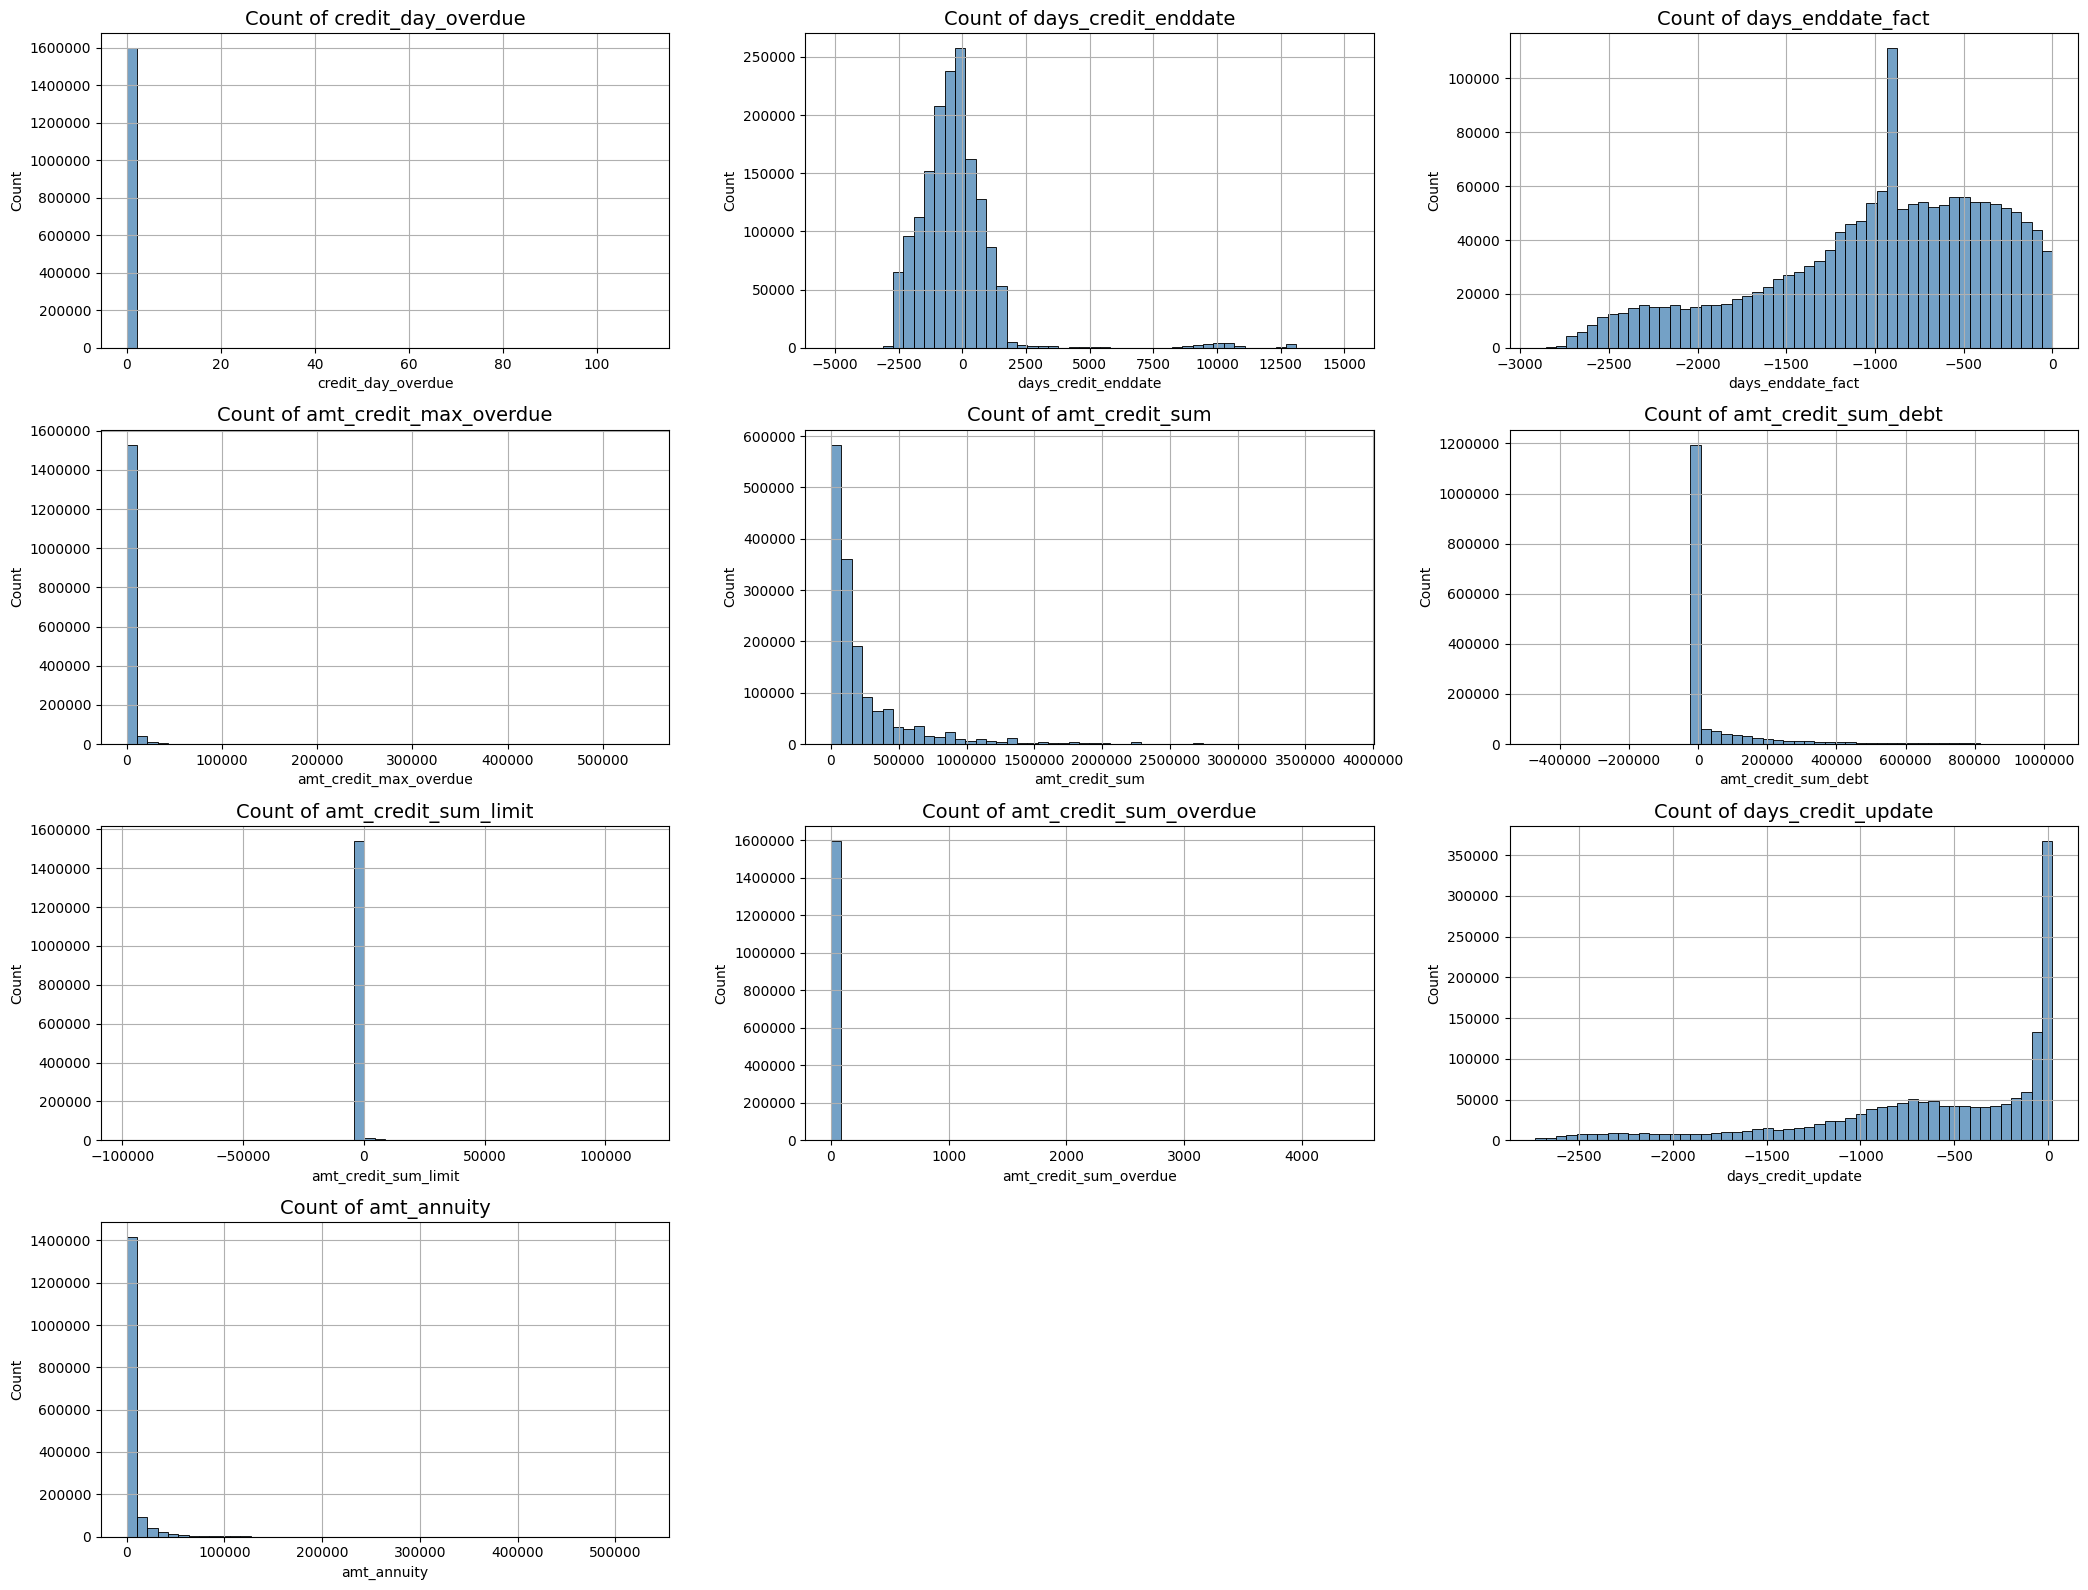

In [11]:
bureau_df = remove_outliers_by_std(
    bureau_df,
    [col for col in bureau_numeric if col not in ["days_credit", "cnt_credit_prolong"]],
)

plot_numeric_distribution(
    bureau_df,
    [col for col in bureau_numeric if col not in ["days_credit", "cnt_credit_prolong"]],
)

We see that some features still have high skeweness but we going to keep them to represent real life happenings.

##### 5.1.3. Converting days to months

Converting all days features except for credit_day_overdue, since it most of it is around 10 days period.

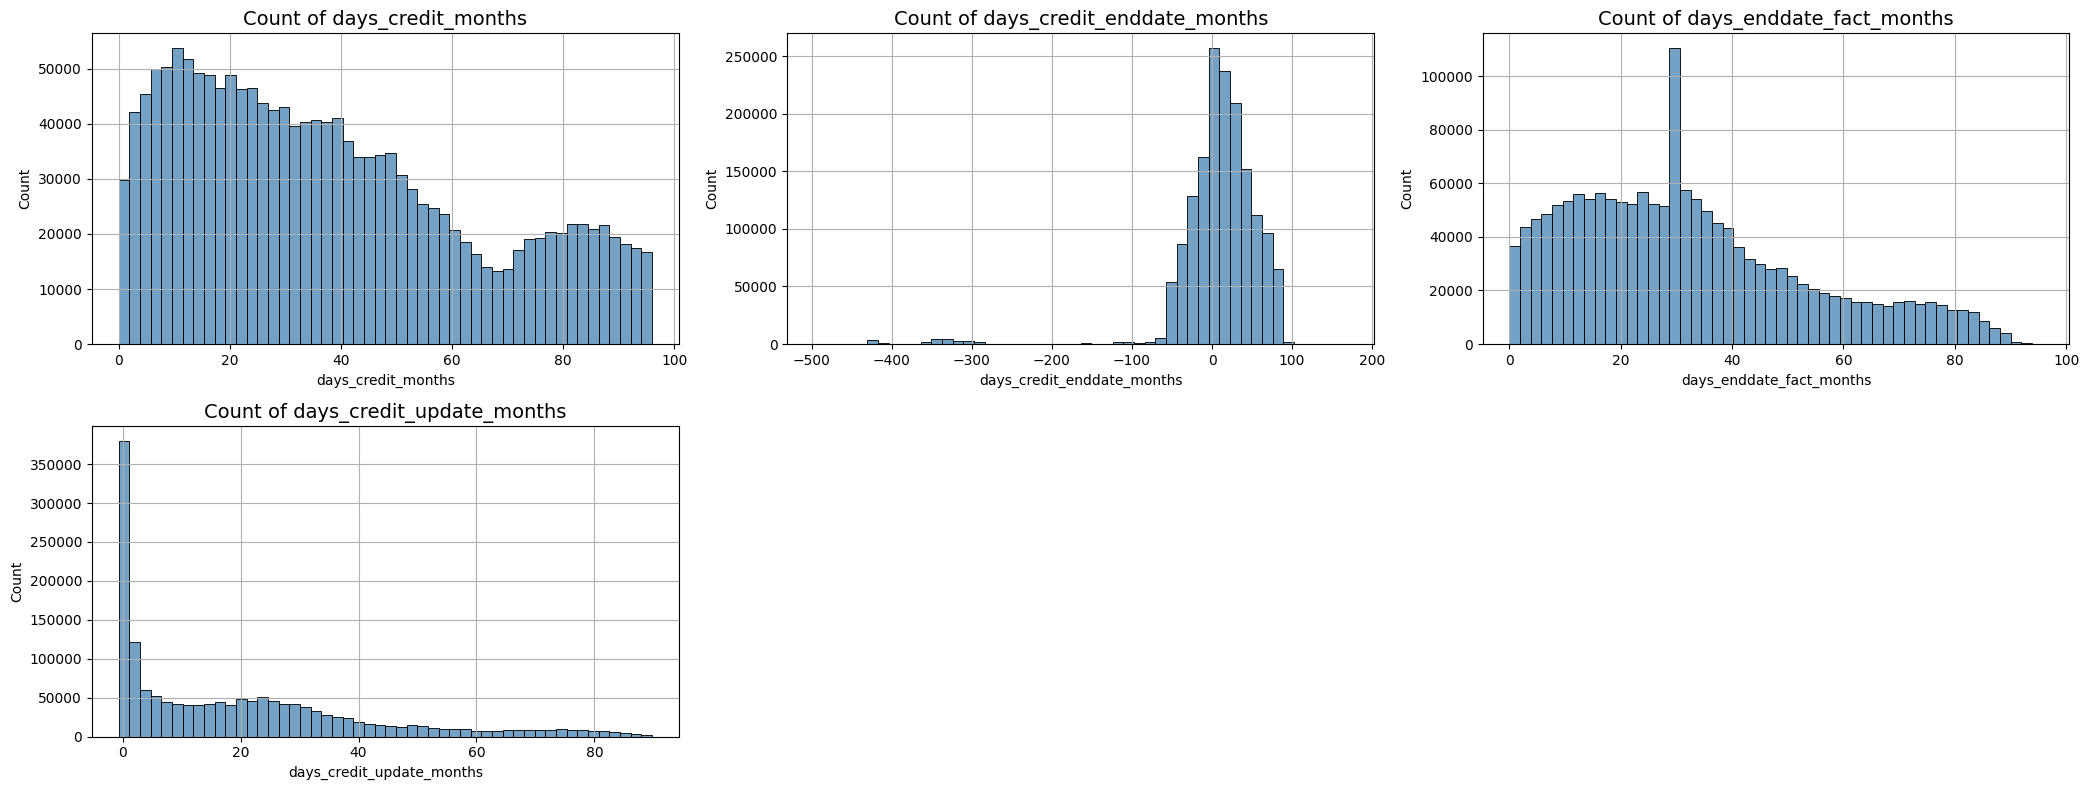

In [12]:
bureau_df = convert_days_to_months(
    bureau_df,
    [
        "days_credit",
        "days_credit_enddate",
        "days_enddate_fact",
        "days_credit_update",
    ],
)

plot_numeric_distribution(
    bureau_df,
    [
        "days_credit_months",
        "days_credit_enddate_months",
        "days_enddate_fact_months",
        "days_credit_update_months",
    ],
)

#### 5.2. Categorical Features

In [13]:
bureau_categorical = bureau_df.select_dtypes(include=["object", "category"])

##### 5.2.1. Unique values in features

In [14]:
print_unique_counts(bureau_df, bureau_categorical)

credit_active: 4 unique values
credit_currency: 4 unique values
credit_type: 14 unique values


##### 5.2.2. Distribution

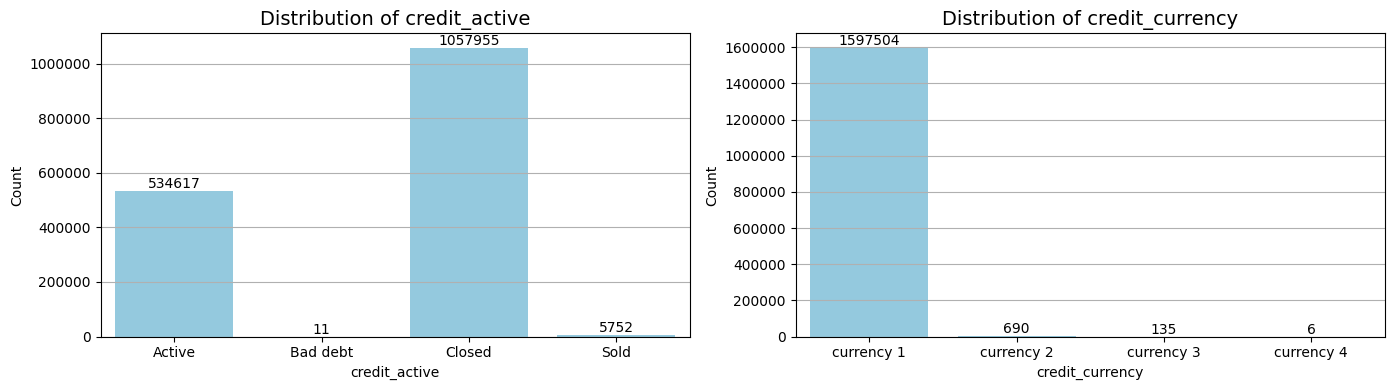

In [15]:
plot_categorical_distribution(
    bureau_df, [col for col in bureau_categorical if col != "credit_type"]
)

Most credits are closed and credit currency is currency 1.

In [16]:
value_counts_rounded(bureau_df, "credit_type")

credit_type
Consumer credit                                 1215939
Credit card                                      340703
Car loan                                          21119
Microloan                                         12323
Mortgage                                           4567
Loan for business development                      1723
Another type of loan                                968
Unknown type of loan                                514
Loan for working capital replenishment              404
Cash loan (non-earmarked)                            51
Real estate loan                                     12
Loan for the purchase of equipment                    8
Loan for purchase of shares (margin lending)          3
Interbank credit                                      1
Name: count, dtype: int64

Credit type is mostly consumer credit.

## Bureau Balance Dataset

###  1. Features in dataset

In [17]:
bureau_balance_df = pd.read_csv("bureau_balance.csv")
bureau_balance_df.columns = (
    bureau_balance_df.columns.str.strip().str.lower().str.replace(" ", "_")
)
show_head_and_info(bureau_balance_df)

Data


,sk_id_bureau,months_balance,status
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C



Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   sk_id_bureau    int64 
 1   months_balance  int64 
 2   status          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


We have 27 299 925 observations and 2 features.

### 2. Duplicated clients

In [18]:
count_clients_with_multiple_records(bureau_balance_df, client_id_col="sk_id_bureau")

811206

### 3. Missing Values

In [19]:
missing_value_summary(bureau_balance_df)

,Missing Count,Missing %


### 4. Duplicated Rows

In [20]:
bureau_balance_df.duplicated().sum()

0

### 5. Distribution of each feature

#### 5.1 Numeric Feature

In [21]:
bureau_balance_df["months_balance"].describe().round(2)

count    27299925.00
mean          -30.74
std            23.86
min           -96.00
25%           -46.00
50%           -25.00
75%           -11.00
max             0.00
Name: months_balance, dtype: float64

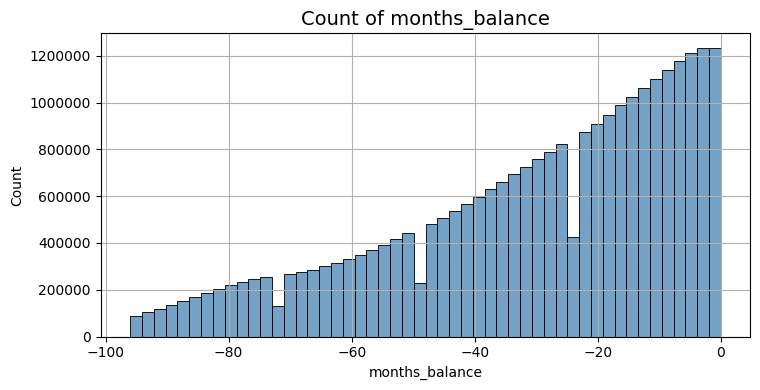

In [22]:
plot_numeric_distribution(bureau_balance_df, ["months_balance"])

Most months balance is around -20 to 0.

#### 5.2. Categorical Feature

In [23]:
print_unique_counts(bureau_balance_df, ["status"])

status: 8 unique values


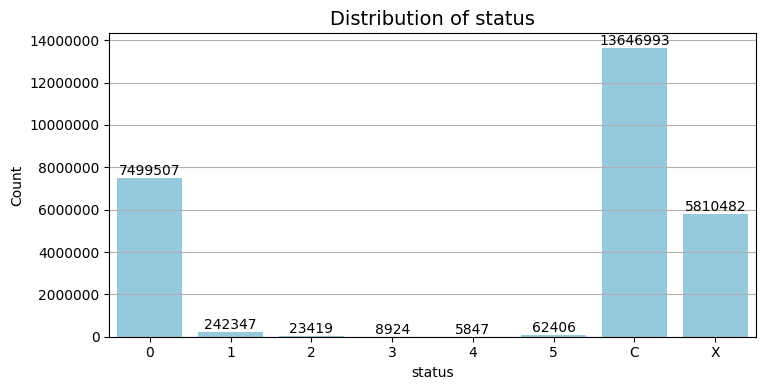

In [24]:
plot_categorical_distribution(bureau_balance_df, ["status"])

Most are closed (C), with close to it being no DPD (0) or unknown (X).

## POS CASH Balance

###  1. Features in dataset

In [25]:
pos_cash_balance_df = pd.read_csv("POS_CASH_balance.csv")
pos_cash_balance_df.columns = (
    pos_cash_balance_df.columns.str.strip().str.lower().str.replace(" ", "_")
)
show_head_and_info(pos_cash_balance_df)

Data


,sk_id_prev,sk_id_curr,months_balance,cnt_instalment,cnt_instalment_future,name_contract_status,sk_dpd,sk_dpd_def
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0



Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   sk_id_prev             int64  
 1   sk_id_curr             int64  
 2   months_balance         int64  
 3   cnt_instalment         float64
 4   cnt_instalment_future  float64
 5   name_contract_status   object 
 6   sk_dpd                 int64  
 7   sk_dpd_def             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


10 001 358 observations and 8 features

### 2. Duplicated clients

In [26]:
count_clients_with_multiple_records(pos_cash_balance_df)

336880

### 3. Missing Values

In [27]:
missing_value_summary(pos_cash_balance_df)

,Missing Count,Missing %
cnt_instalment_future,26087,0.26
cnt_instalment,26071,0.26


In [28]:
pos_cash_balance_df = fill_missing_values(pos_cash_balance_df, group_col="sk_id_curr")

missing_value_summary(pos_cash_balance_df)

,Missing Count,Missing %


### 4. Duplicated Rows

In [29]:
pos_cash_balance_df.duplicated().sum()

0

### 5. Distribution of each feature

#### 5.1. Numeric Features

In [30]:
pos_cash_numeric = [
    col
    for col in pos_cash_balance_df.select_dtypes(include="number").columns
    if col not in ["sk_id_curr", "sk_id_prev"]
]

##### 5.1.1. Distribution

In [31]:
pos_cash_balance_df[pos_cash_numeric].describe().round(2)

,months_balance,cnt_instalment,cnt_instalment_future,sk_dpd,sk_dpd_def
count,10001358.00,10001358.00,10001358.00,10001358.00,10001358.00
mean,-35.01,17.08,10.48,11.61,0.65
std,26.07,11.99,11.10,132.71,32.76
min,-96.00,1.00,0.00,0.00,0.00
25%,-54.00,10.00,3.00,0.00,0.00
50%,-28.00,12.00,7.00,0.00,0.00
75%,-13.00,24.00,14.00,0.00,0.00
max,-1.00,92.00,85.00,4231.00,3595.00


* months_balance: average is -35, ranging from -96 to -1.
* cnt_instalment averages 17, with a max of 92.
* cnt_instalment_future averages about 10.5, max 85.
* sk_dpd and sk_dpd_def: Most are 0.
* sk_dpd has a mean of 11.6 but a very high max of 4,231, indicating outliers.
* sk_dpd_def mean is 0.65, with a max of 3,595, also showing extreme values.

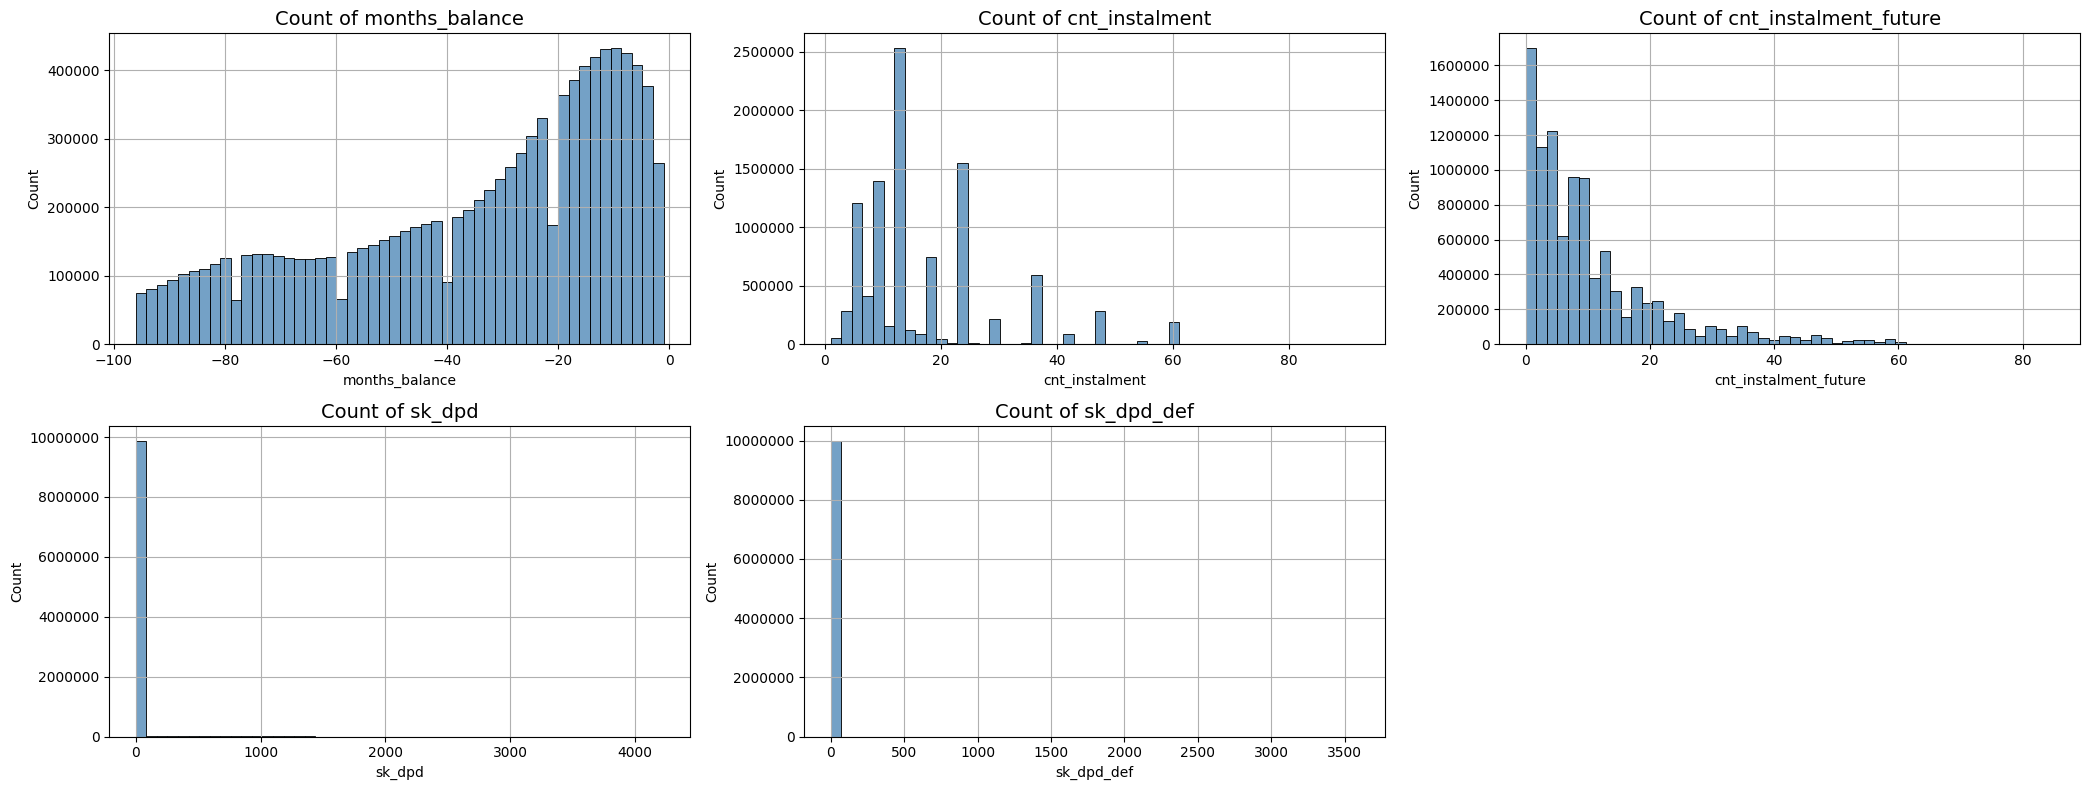

In [32]:
plot_numeric_distribution(pos_cash_balance_df, pos_cash_numeric)

* months_balance distribution looks the same as in bureau balance dataset.
* cnt_instalment and cnt_instalment_future varies from 0 to around 80.
* sk_dpd and sk_dpd_def mostly around 0, which seems like it has high outliers

##### 5.1.2. Outliers

In [33]:
detect_outliers(pos_cash_balance_df, pos_cash_numeric)

Outliers detected in 'months_balance': 0
Outliers detected in 'cnt_instalment': 498942
Outliers detected in 'cnt_instalment_future': 694999
Outliers detected in 'sk_dpd': 295227
Outliers detected in 'sk_dpd_def': 113969


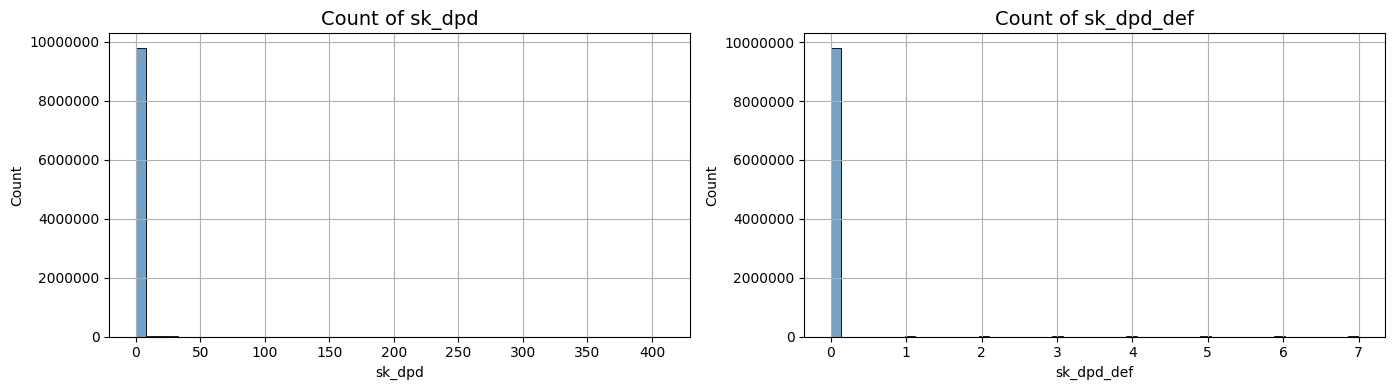

In [34]:
pos_cash_balance_df = remove_outliers_by_std(
    pos_cash_balance_df, ["sk_dpd", "sk_dpd_def"]
)

plot_numeric_distribution(pos_cash_balance_df, ["sk_dpd", "sk_dpd_def"])

Without higher outlier sk_dpd mostly around 0 to 25 and sk_dpd_def is mostly 0.

#### 5.2. Categorical Features

In [35]:
print_unique_counts(pos_cash_balance_df, ["name_contract_status"])

name_contract_status: 9 unique values


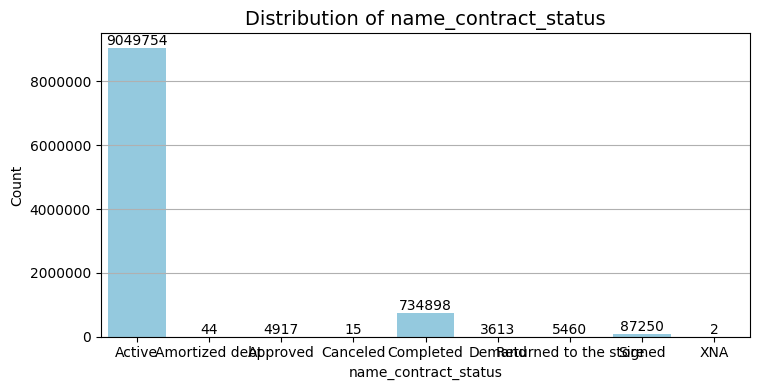

In [36]:
plot_categorical_distribution(pos_cash_balance_df, ["name_contract_status"])

Most contract status is active and having some completed.

## Credit Card Balance Dataset

###  1. Features in dataset

In [37]:
credit_card_balance_df = pd.read_csv("credit_card_balance.csv")
credit_card_balance_df.columns = (
    credit_card_balance_df.columns.str.strip().str.lower().str.replace(" ", "_")
)
show_head_and_info(credit_card_balance_df)

Data


,sk_id_prev,sk_id_curr,months_balance,amt_balance,amt_credit_limit_actual,amt_drawings_atm_current,amt_drawings_current,amt_drawings_other_current,amt_drawings_pos_current,amt_inst_min_regularity,amt_payment_current,amt_payment_total_current,amt_receivable_principal,amt_recivable,amt_total_receivable,cnt_drawings_atm_current,cnt_drawings_current,cnt_drawings_other_current,cnt_drawings_pos_current,cnt_instalment_mature_cum,name_contract_status,sk_dpd,sk_dpd_def
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0



Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   sk_id_prev                  int64  
 1   sk_id_curr                  int64  
 2   months_balance              int64  
 3   amt_balance                 float64
 4   amt_credit_limit_actual     int64  
 5   amt_drawings_atm_current    float64
 6   amt_drawings_current        float64
 7   amt_drawings_other_current  float64
 8   amt_drawings_pos_current    float64
 9   amt_inst_min_regularity     float64
 10  amt_payment_current         float64
 11  amt_payment_total_current   float64
 12  amt_receivable_principal    float64
 13  amt_recivable               float64
 14  amt_total_receivable        float64
 15  cnt_drawings_atm_current    float64
 16  cnt_drawings_current        int64  
 17  cnt_drawings_other_current  float64
 18  cnt_drawings_pos_current    float64
 19  cnt_instalment_

3 840 312 observations and 23 features.

### 2. Duplicated clients

In [38]:
count_clients_with_multiple_records(credit_card_balance_df)

102866

### 3. Missing Values

In [39]:
missing_value_summary(credit_card_balance_df)

,Missing Count,Missing %
amt_payment_current,767988,20.00
amt_drawings_atm_current,749816,19.52
amt_drawings_other_current,749816,19.52
amt_drawings_pos_current,749816,19.52
cnt_drawings_atm_current,749816,19.52
cnt_drawings_other_current,749816,19.52
cnt_drawings_pos_current,749816,19.52
amt_inst_min_regularity,305236,7.95
cnt_instalment_mature_cum,305236,7.95


In [40]:
credit_card_balance_df = fill_missing_values(
    credit_card_balance_df, group_col="sk_id_curr"
)

missing_value_summary(credit_card_balance_df)

,Missing Count,Missing %


### 4. Duplicated Rows

In [41]:
credit_card_balance_df.duplicated().sum()

0

### 5. Distribution of each feature

#### 5.1. Numeric Features

In [42]:
credit_card_numeric = [
    col
    for col in credit_card_balance_df.select_dtypes(include="number").columns
    if col not in ["sk_id_curr", "sk_id_prev"]
]

##### 5.1.1. Distribution

In [43]:
credit_card_balance_df[credit_card_numeric].describe().round(2)

,months_balance,amt_balance,amt_credit_limit_actual,amt_drawings_atm_current,amt_drawings_current,amt_drawings_other_current,amt_drawings_pos_current,amt_inst_min_regularity,amt_payment_current,amt_payment_total_current,amt_receivable_principal,amt_recivable,amt_total_receivable,cnt_drawings_atm_current,cnt_drawings_current,cnt_drawings_other_current,cnt_drawings_pos_current,cnt_instalment_mature_cum,sk_dpd,sk_dpd_def
count,3840312.00,3840312.00,3840312.00,3840312.00,3840312.00,3840312.00,3840312.00,3840312.00,3840312.00,3840312.00,3840312.00,3840312.00,3840312.00,3840312.00,3840312.00,3840312.00,3840312.00,3840312.00,3840312.00,3840312.00
mean,-34.52,58300.16,153807.96,4911.96,7433.39,234.00,2479.62,3341.64,9134.82,7588.86,55965.88,58088.81,58098.29,0.25,0.70,0.00,0.47,19.55,9.28,0.33
std,26.67,106307.03,165145.70,25706.12,33846.08,7381.15,18922.44,5500.59,32639.58,32005.99,102533.62,105965.37,105971.80,1.00,3.19,0.07,2.95,19.96,97.52,21.48
min,-96.00,-420250.18,0.00,-6827.31,-6211.62,0.00,0.00,0.00,0.00,0.00,-423305.82,-420250.18,-420250.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-55.00,0.00,45000.00,0.00,0.00,0.00,0.00,0.00,237.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
50%,-28.00,0.00,112500.00,0.00,0.00,0.00,0.00,0.00,3144.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.00,0.00,0.00
75%,-11.00,89046.69,180000.00,0.00,0.00,0.00,0.00,5625.00,9000.00,6750.00,85359.24,88899.49,88914.51,0.00,0.00,0.00,0.00,31.00,0.00,0.00
max,-1.00,1505902.18,1350000.00,2115000.00,2287098.32,1529847.00,2239274.16,202882.00,4289207.44,4278315.69,1472316.80,1493338.18,1493338.18,51.00,165.00,12.00,165.00,120.00,3260.00,3260.00


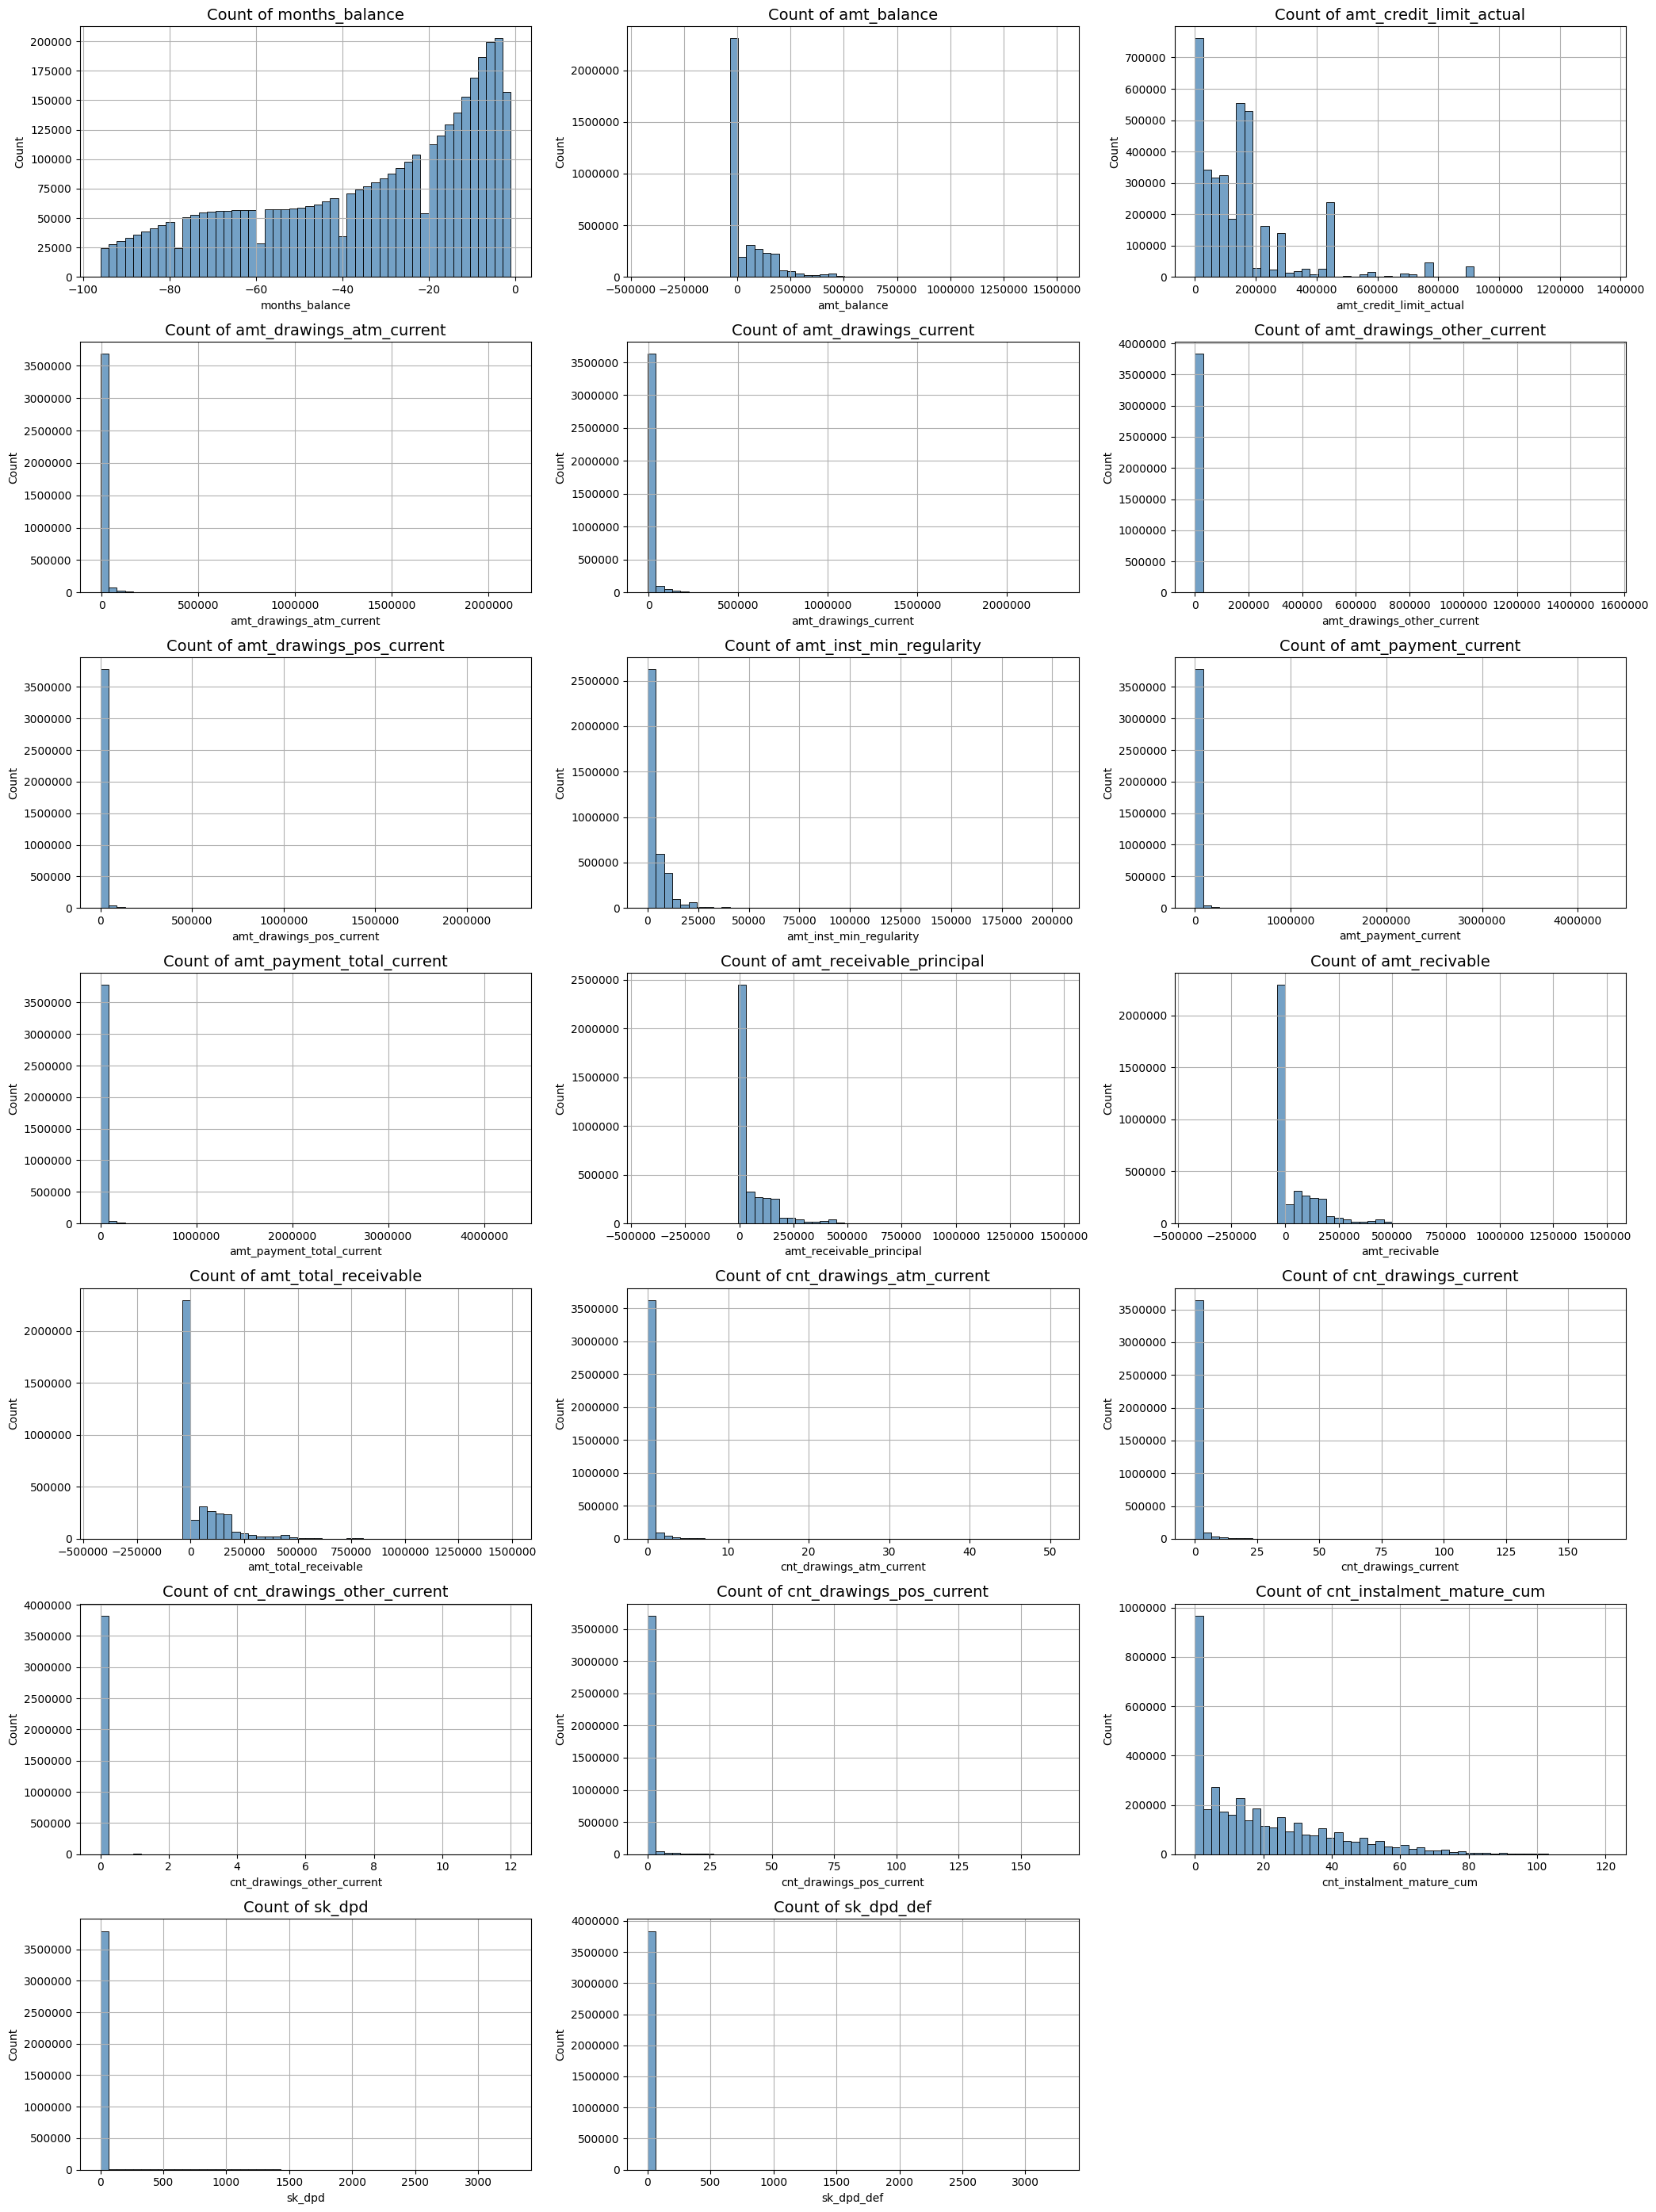

In [44]:
plot_numeric_distribution(credit_card_balance_df, credit_card_numeric)

* months_balance: goes from 0 to around -100, highest counts are around 0 to -20.
* amt_balance: most counts are around from 0 to 500 000, most are around 0.
* amt_credit_limit_actual: most focused from 0 to 200 000.
* cnt_instalment_mature_cum: most are 0, but varies upto 120.
* amt_inst_min_regularity, amt_receivable_principal, amt_recivable, amt_total_receivable: most are around 0 to 250 000 values.
* amt_drawings_atm_current, amt_drawings_current, amt_drawings_other_current, amt_drawings_pos_current, amt_payment_current, amt_payment_total_current, cnt_drawings_atm_current, cnt_drawings_current, cnt_drawings_other_current, cnt_drawings_pos_current: most are 0, with having few high outliers.
* sk_dpd and sk_dpd_def: most are around 0, with a lot of higher outliers.

##### 5.1.2. Outliers

In [45]:
detect_outliers(credit_card_balance_df, credit_card_numeric)

Outliers detected in 'months_balance': 0
Outliers detected in 'amt_balance': 248146
Outliers detected in 'amt_credit_limit_actual': 404927
Outliers detected in 'amt_drawings_atm_current': 438538
Outliers detected in 'amt_drawings_current': 616869
Outliers detected in 'amt_drawings_other_current': 12458
Outliers detected in 'amt_drawings_pos_current': 281377
Outliers detected in 'amt_inst_min_regularity': 161047
Outliers detected in 'amt_payment_current': 302753
Outliers detected in 'amt_payment_total_current': 324742
Outliers detected in 'amt_receivable_principal': 250529
Outliers detected in 'amt_recivable': 247510
Outliers detected in 'amt_total_receivable': 247473
Outliers detected in 'cnt_drawings_atm_current': 438538
Outliers detected in 'cnt_drawings_current': 610360
Outliers detected in 'cnt_drawings_other_current': 12933
Outliers detected in 'cnt_drawings_pos_current': 281378
Outliers detected in 'cnt_instalment_mature_cum': 58845
Outliers detected in 'sk_dpd': 153355
Outliers 

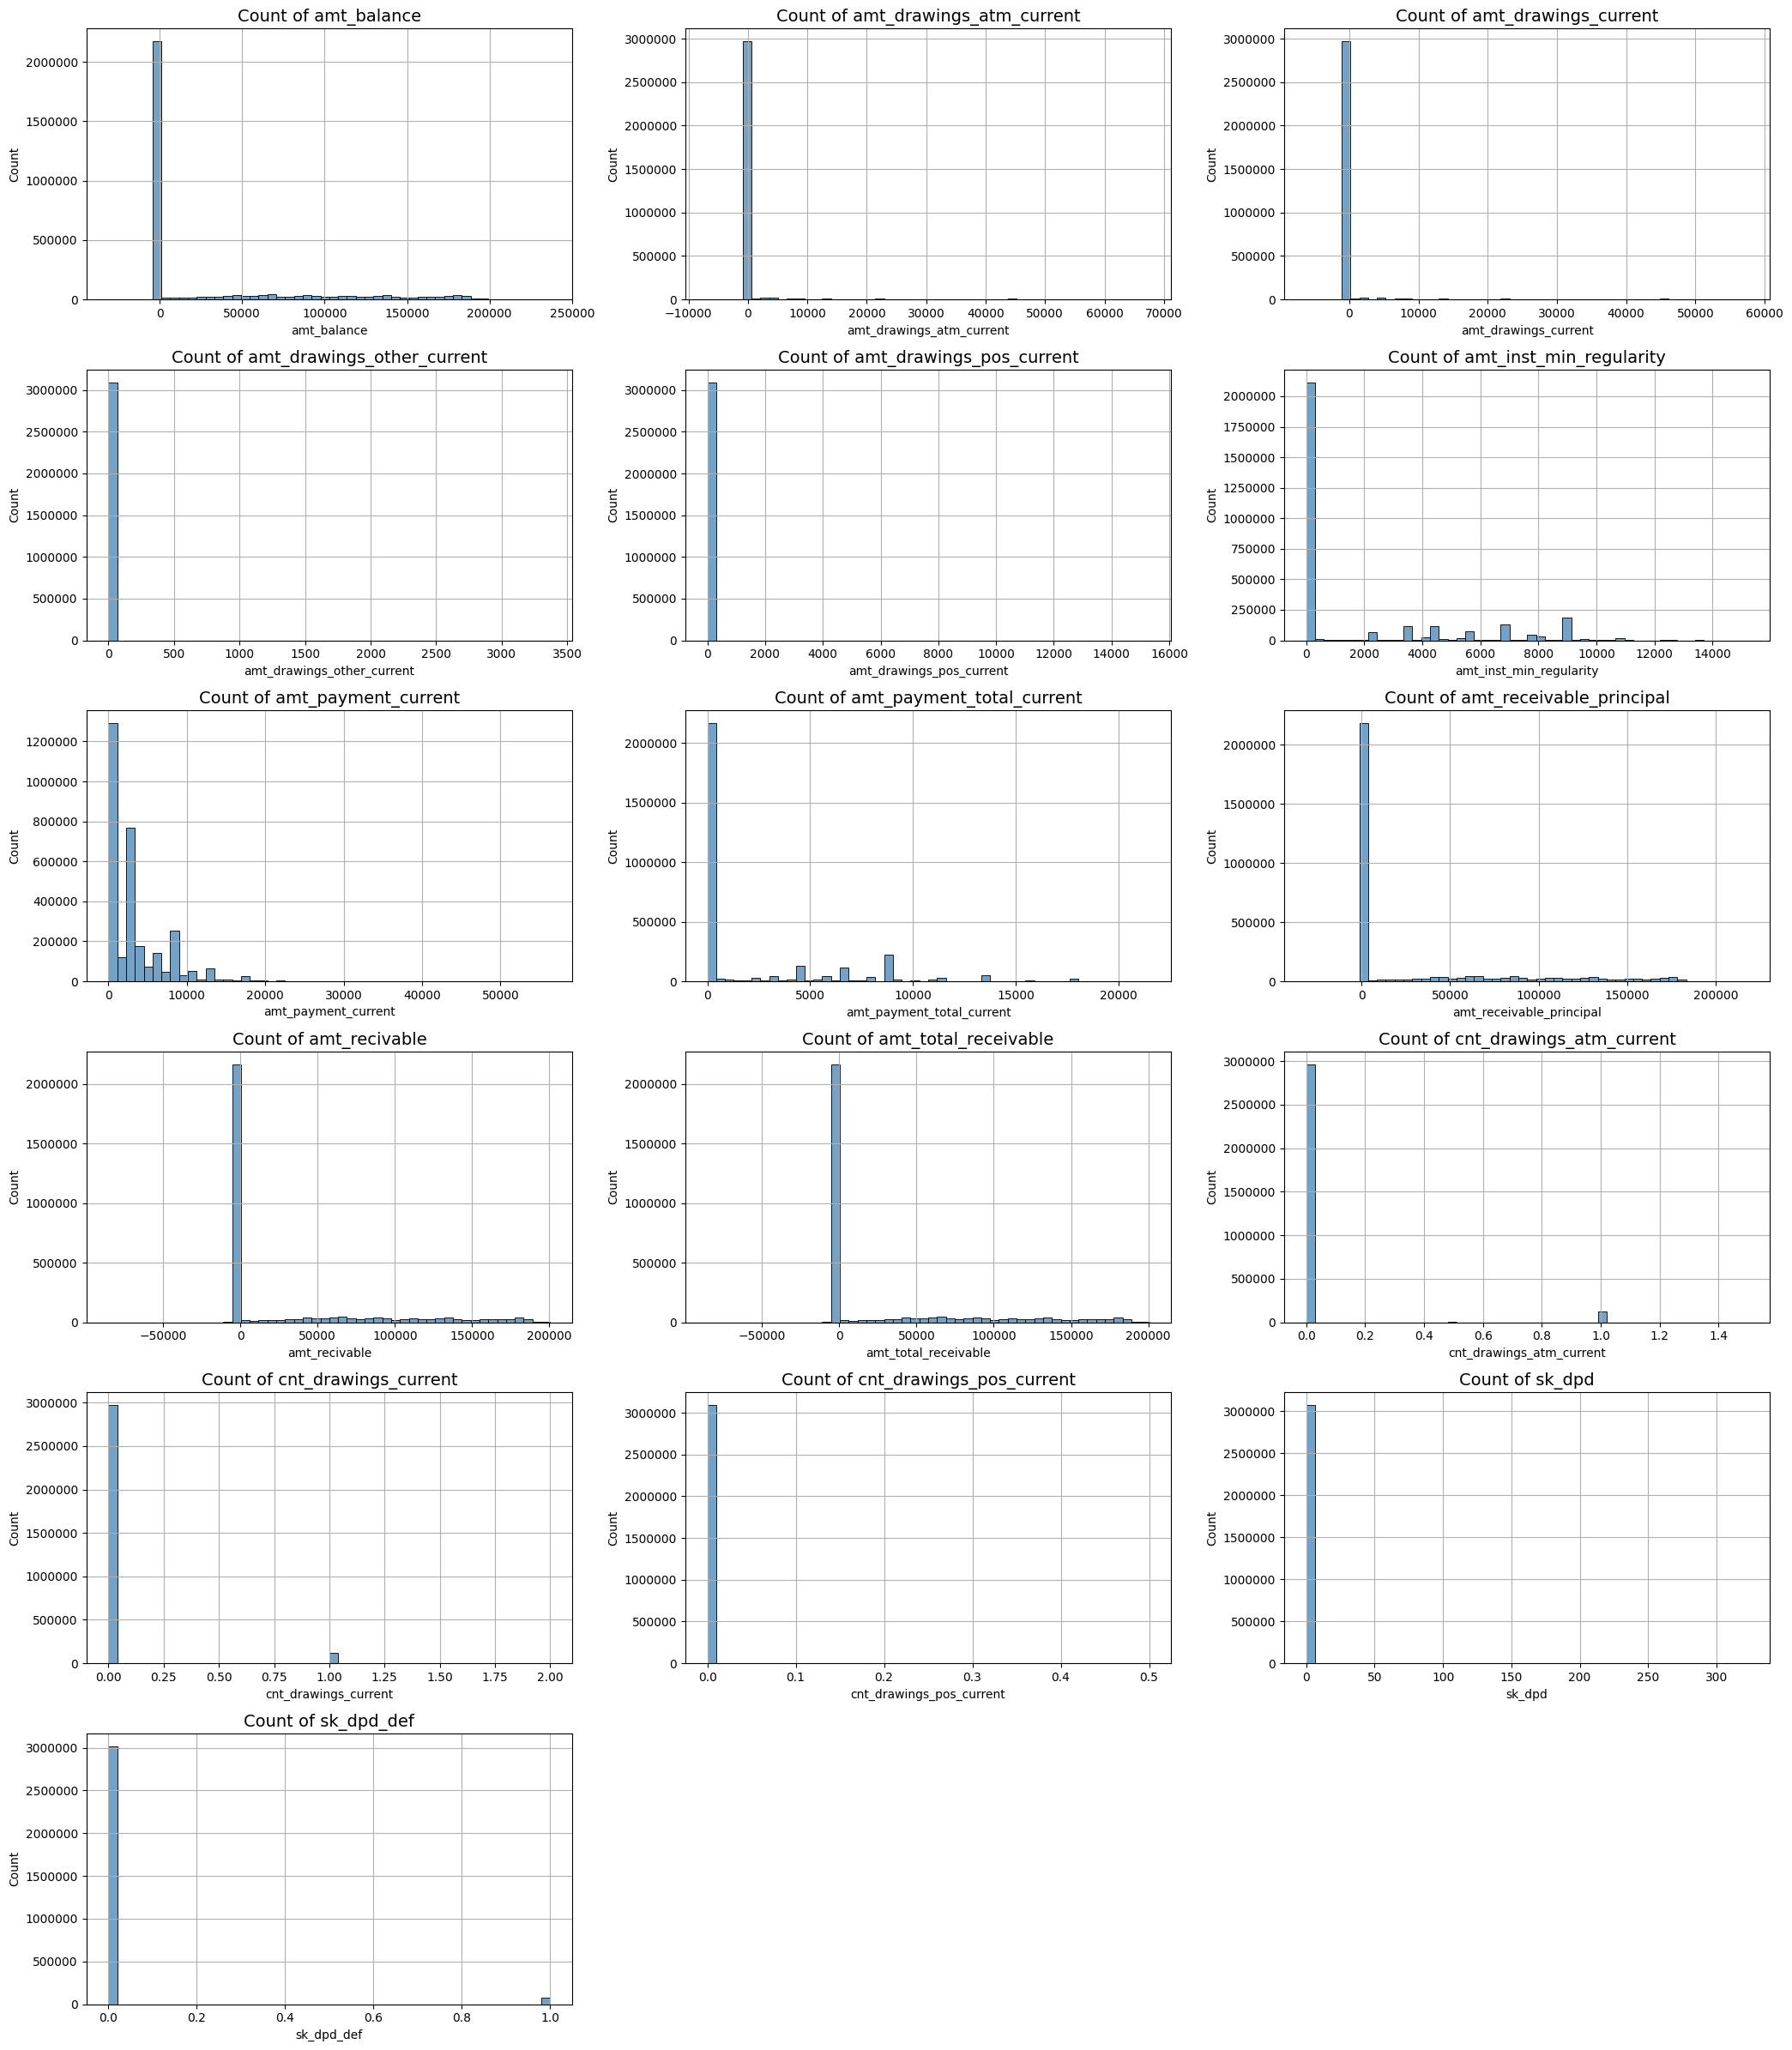

In [46]:
credit_card_balance_df = remove_outliers_by_std(
    credit_card_balance_df,
    [
        col
        for col in credit_card_numeric
        if col
        not in [
            "months_balance",
            "amt_credit_limit_actual",
            "cnt_instalment_mature_cum",
            "cnt_drawings_other_current",
        ]
    ],
)


plot_numeric_distribution(
    credit_card_balance_df,
    [
        col
        for col in credit_card_numeric
        if col
        not in [
            "months_balance",
            "amt_credit_limit_actual",
            "cnt_instalment_mature_cum",
            "cnt_drawings_other_current",
        ]
    ],
)

* amt_balance: Most balances are low with a long tail of higher values.
* amt_credit_limit_actual: Credit limits are skewed low, with distinct levels suggesting discrete tiers.
* amt_drawings_atm_current, amt_drawings_pos_current, amt_drawings_other_current, amt_drawings_current: Most clients make few or no drawings; values are typically zero, with some high outliers for ATM usage.
* cnt_drawings_atm_current, cnt_drawings_pos_current, cnt_drawings_other_current, cnt_drawings_current: Count data mirrors the drawing amounts — most are zero, with some having low counts or binary distributions.
* amt_inst_min_regularity: Most clients have low regular installment amounts; a few outliers exist.
* amt_payment_current, amt_payment_total_current: Payments are skewed toward small amounts, though some clients make significantly large payments.
* amt_receivable_principal, amt_recivable, amt_total_receivable: Nearly all values are close to zero, with occasional small or large positive values. Some negative values suggest potential data issues or refunds.
* sk_dpd, sk_dpd_def: Delinquency and default indicators are nearly always zero, implying very few late payments or defaults.

#### 5.2. Categorical Features

In [47]:
print_unique_counts(credit_card_balance_df, ["name_contract_status"])

name_contract_status: 7 unique values


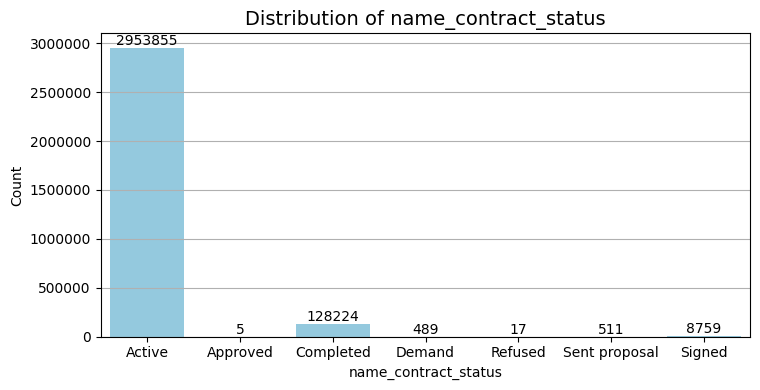

In [48]:
plot_categorical_distribution(credit_card_balance_df, ["name_contract_status"])

Most contact status are active (2 953 855).

## Previous Application Dataset

###  1. Features in dataset

In [49]:
previous_application_df = pd.read_csv("previous_application.csv")
previous_application_df.columns = (
    previous_application_df.columns.str.strip().str.lower().str.replace(" ", "_")
)
show_head_and_info(previous_application_df)

Data


,sk_id_prev,sk_id_curr,name_contract_type,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,weekday_appr_process_start,hour_appr_process_start,flag_last_appl_per_contract,nflag_last_appl_in_day,rate_down_payment,rate_interest_primary,rate_interest_privileged,name_cash_loan_purpose,name_contract_status,days_decision,name_payment_type,code_reject_reason,name_type_suite,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,sellerplace_area,name_seller_industry,cnt_payment,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN



Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   sk_id_prev                   1670214 non-null  int64  
 1   sk_id_curr                   1670214 non-null  int64  
 2   name_contract_type           1670214 non-null  object 
 3   amt_annuity                  1297979 non-null  float64
 4   amt_application              1670214 non-null  float64
 5   amt_credit                   1670213 non-null  float64
 6   amt_down_payment             774370 non-null   float64
 7   amt_goods_price              1284699 non-null  float64
 8   weekday_appr_process_start   1670214 non-null  object 
 9   hour_appr_process_start      1670214 non-null  int64  
 10  flag_last_appl_per_contract  1670214 non-null  object 
 11  nflag_last_appl_in_day       1670214 non-null  int64  
 12  rate_down_payment            774370 

1 670 214 observations and 37 features.

### 2. Duplicated clients

In [50]:
count_clients_with_multiple_records(previous_application_df)

278399

### 3. Missing Values

In [51]:
missing_value_summary(previous_application_df)

,Missing Count,Missing %
rate_interest_primary,1664263,99.64
rate_interest_privileged,1664263,99.64
amt_down_payment,895844,53.64
rate_down_payment,895844,53.64
name_type_suite,820405,49.12
days_first_drawing,673065,40.30
days_first_due,673065,40.30
days_last_due_1st_version,673065,40.30
days_last_due,673065,40.30
days_termination,673065,40.30


In [52]:
previous_application_df = fill_missing_values(
    previous_application_df, group_col="sk_id_curr"
)

missing_value_summary(previous_application_df)

,Missing Count,Missing %


### 4. Duplicated Rows

In [53]:
previous_application_df.duplicated().sum()

0

### 5. Distribution of each feature

#### 5.1. Numeric Features

In [54]:
previous_numeric = [
    col
    for col in previous_application_df.select_dtypes(include="number").columns
    if col not in ["sk_id_curr", "sk_id_prev"]
]

##### 5.1.1. Distribution

In [55]:
previous_application_df[previous_numeric].describe().round(2)

,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,hour_appr_process_start,nflag_last_appl_in_day,rate_down_payment,rate_interest_primary,rate_interest_privileged,days_decision,sellerplace_area,cnt_payment,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
count,1670214.00,1670214.00,1670214.00,1670214.00,1670214.00,1670214.00,1670214.00,1670214.00,1670214.00,1670214.00,1670214.00,1670214.00,1670214.00,1670214.0,1670214.00,1670214.00,1670214.00,1670214.00,1670214.00
mean,16003.77,175233.86,196114.03,5979.56,230143.88,12.48,1.00,0.07,0.19,0.83,-880.68,313.95,16.23,347795.8,9051.40,24432.20,66198.17,70843.87,0.33
std,13987.72,292779.76,318574.52,18178.83,299649.05,3.33,0.06,0.10,0.01,0.02,779.10,7127.44,13.99,74532.1,58418.65,88719.49,135646.99,139127.78,0.45
min,0.00,0.00,0.00,-0.90,0.00,0.00,0.00,-0.00,0.03,0.37,-2922.00,-1.00,0.00,-2922.0,-2892.00,-2801.00,-2889.00,-2874.00,0.00
25%,6750.00,18720.00,24160.50,0.00,59337.00,10.00,1.00,0.00,0.19,0.84,-1300.00,-1.00,6.00,365243.0,-1422.00,-978.00,-1091.00,-1044.00,0.00
50%,11687.40,71046.00,80541.00,2058.75,122346.00,12.00,1.00,0.05,0.19,0.84,-581.00,3.00,12.00,365243.0,-811.00,-316.00,-499.50,-462.00,0.00
75%,20622.78,180360.00,216418.50,6750.00,252000.00,15.00,1.00,0.11,0.19,0.84,-280.00,82.00,24.00,365243.0,-450.00,94.00,-92.00,-59.00,1.00
max,418058.14,6905160.00,6905160.00,3060045.00,6905160.00,23.00,1.00,1.00,1.00,1.00,-1.00,4000000.00,84.00,365243.0,365243.00,365243.00,365243.00,365243.00,1.00


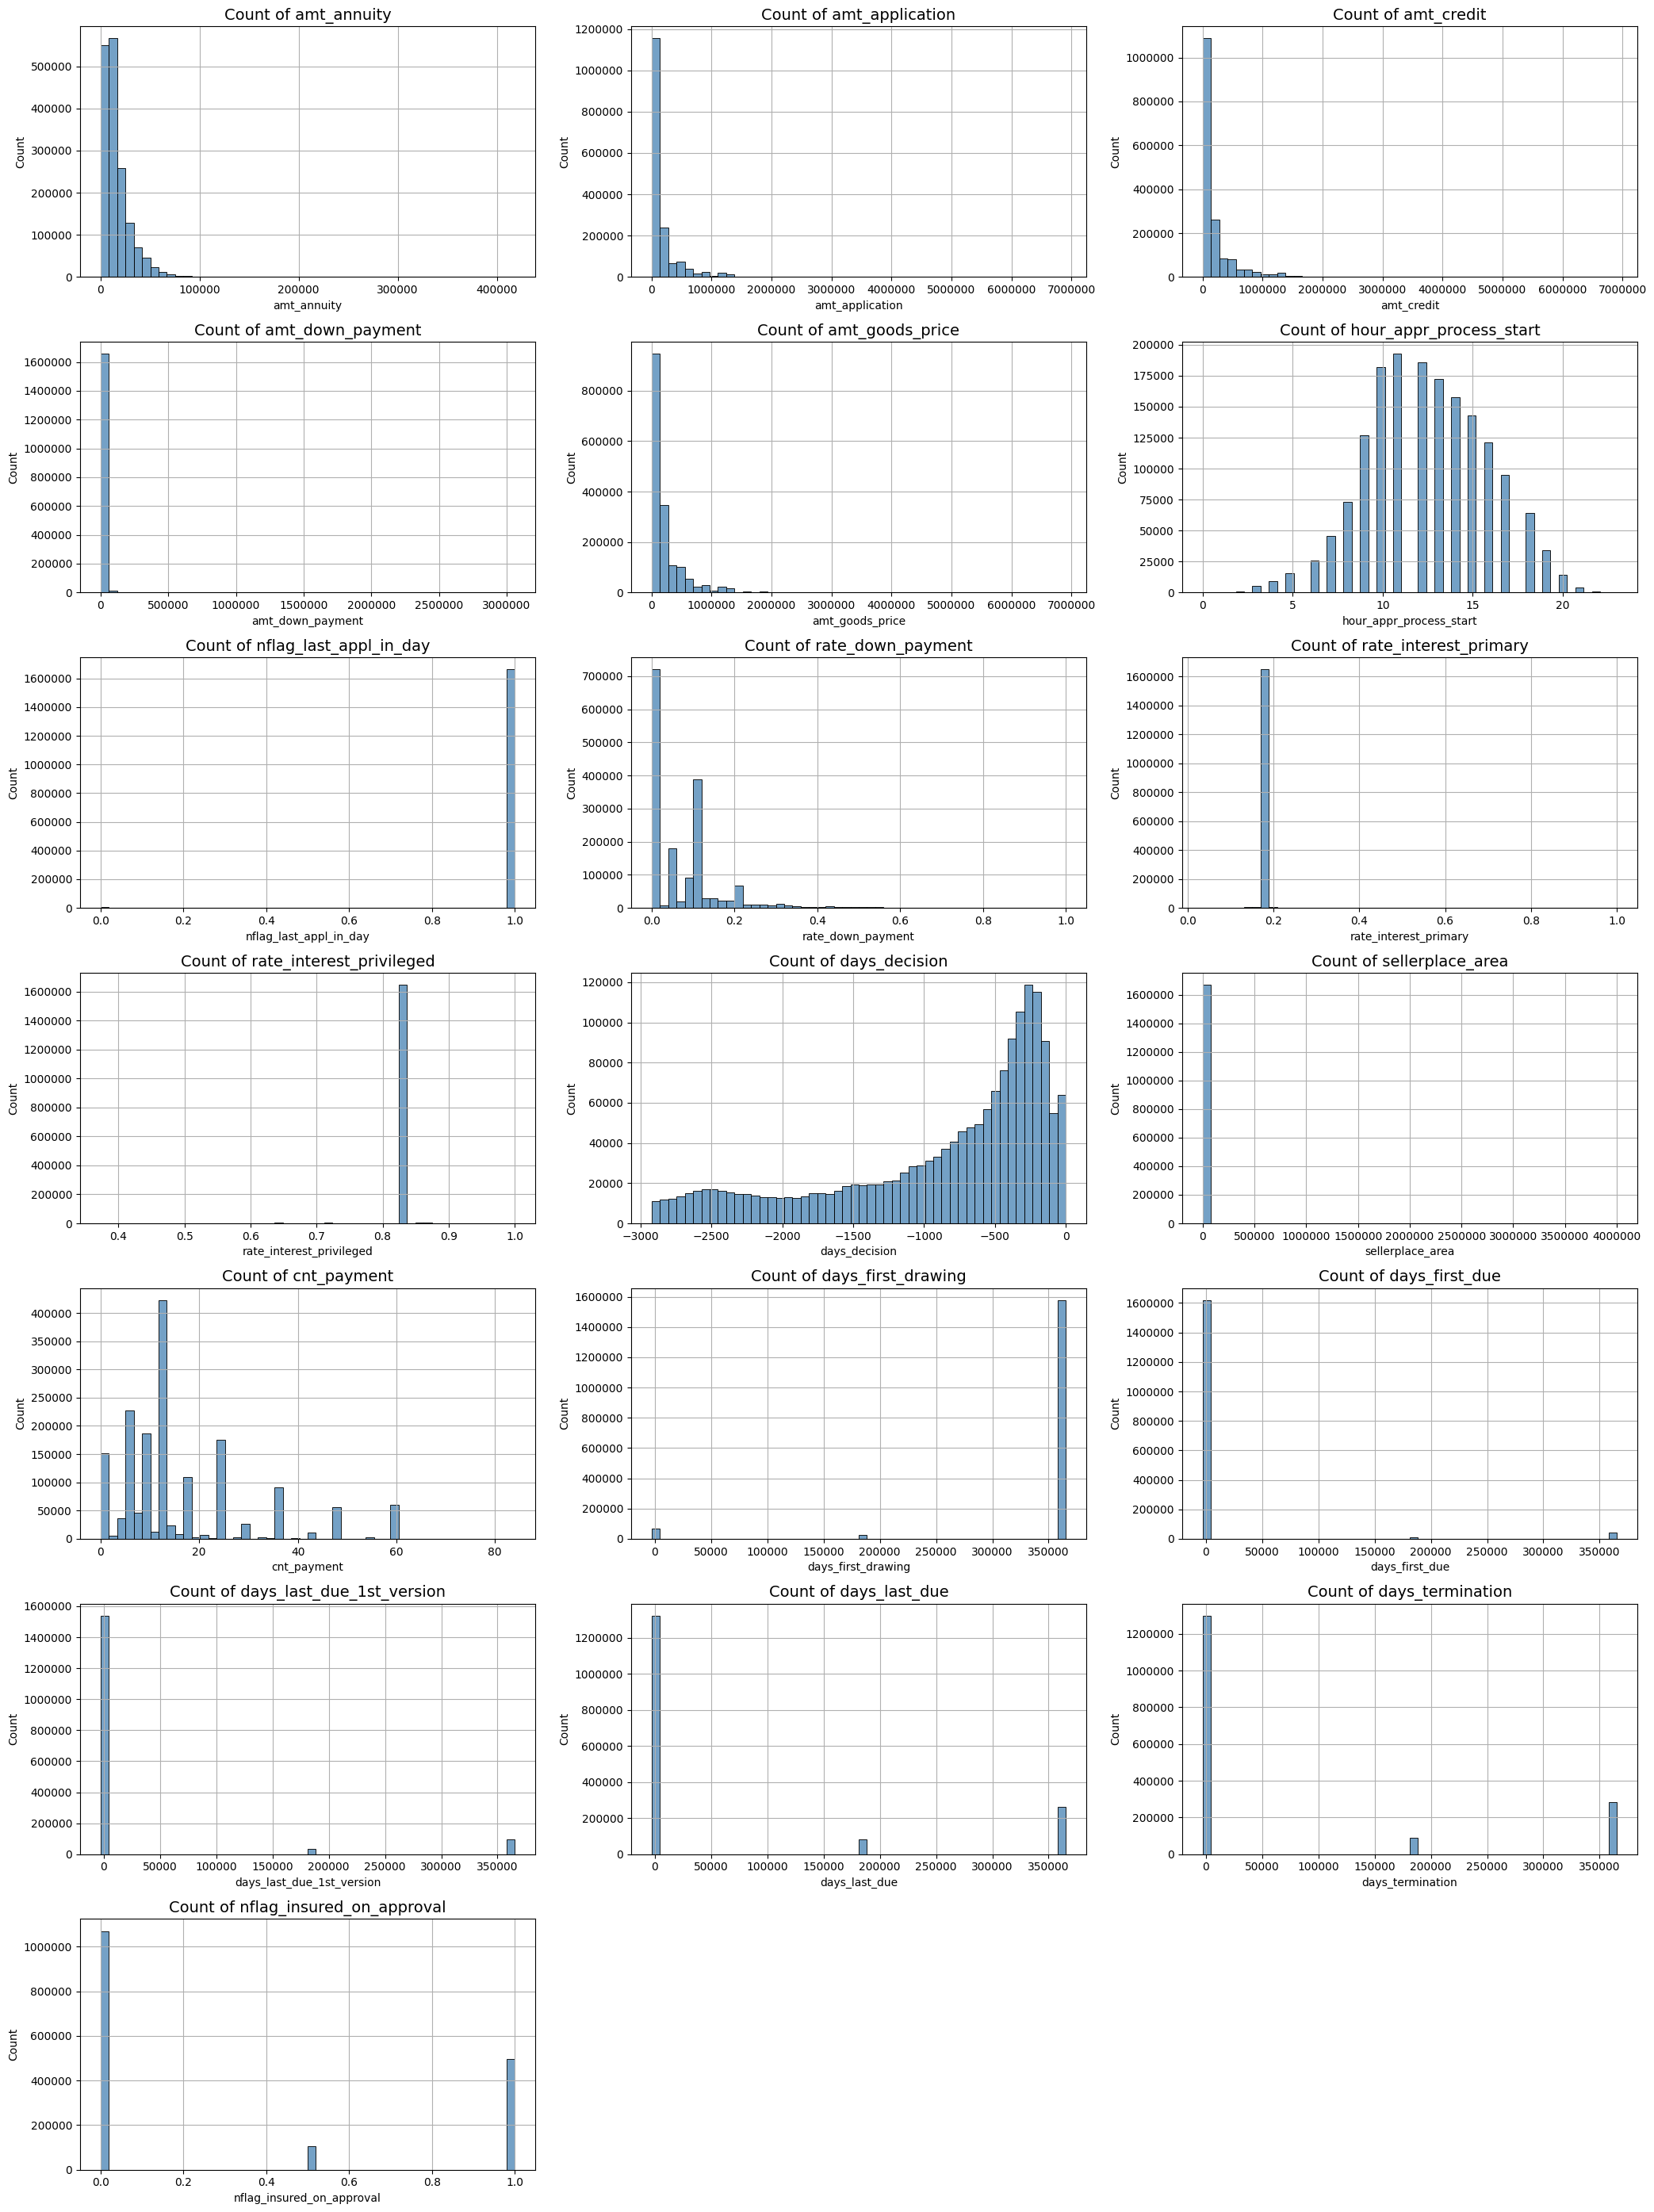

In [56]:
plot_numeric_distribution(previous_application_df, previous_numeric)

* amt_annuity: most values are on the lower end, distribution righ skewed.
* amt_application: most values are on the lower end, distribution right skewed.
* amt_credit: most values are on the lower end, distribution right skewed.
* amt_down_payment: most values are on the lower end, distribution is right skewed.
* amt_goods_price: most values are on the lower end, distribution is right skewed.
* hour_appr_process_start: most start to process during work hours.
* nflag_last_appl_in_day: most are 1 - yes with few being 0 - no.
* rate_down_payment: most values are close to 0, mostly around 0 to 0.2.
* rate_interest_primary: sames as rate_down_payment, just less varietion, with most values being around 0.2.
* rate_interest_privileged: have a bit higher values than other rate feature, with most values being between 0.8 to 0.9.
* days_decision: have variety between -3 000 to 0, most values are around -500 to -100.
* sellerplace_area: most are around 0, have high outliers.
* cnt_payment: most are 0 to 20, a bit right skewed.
* days_first_drawing: most are around 350 000 values and some where close to 0, with also having small peak in the middle around 200 000.
* days_first_due: most are 0, with having some higher values around around 350 000, with also having small peak in the middle around 200 000.
* days_last_due_1st_version: sames as other days, some are at 0 and others around 350 000, with also having small peak in the middle around 200 000.
* days_last_due: same as other day features, 3 peaks around 0, 200 000 and 350 000.
* days_termination: same as other day features, 3 peaks around 0, 200 000 and 350 000.
* nflag_insured_on_approval: most are 0.

Days columns have placeholder (365243) that is used for unknown data

##### 5.1.2. Handling Placeholders

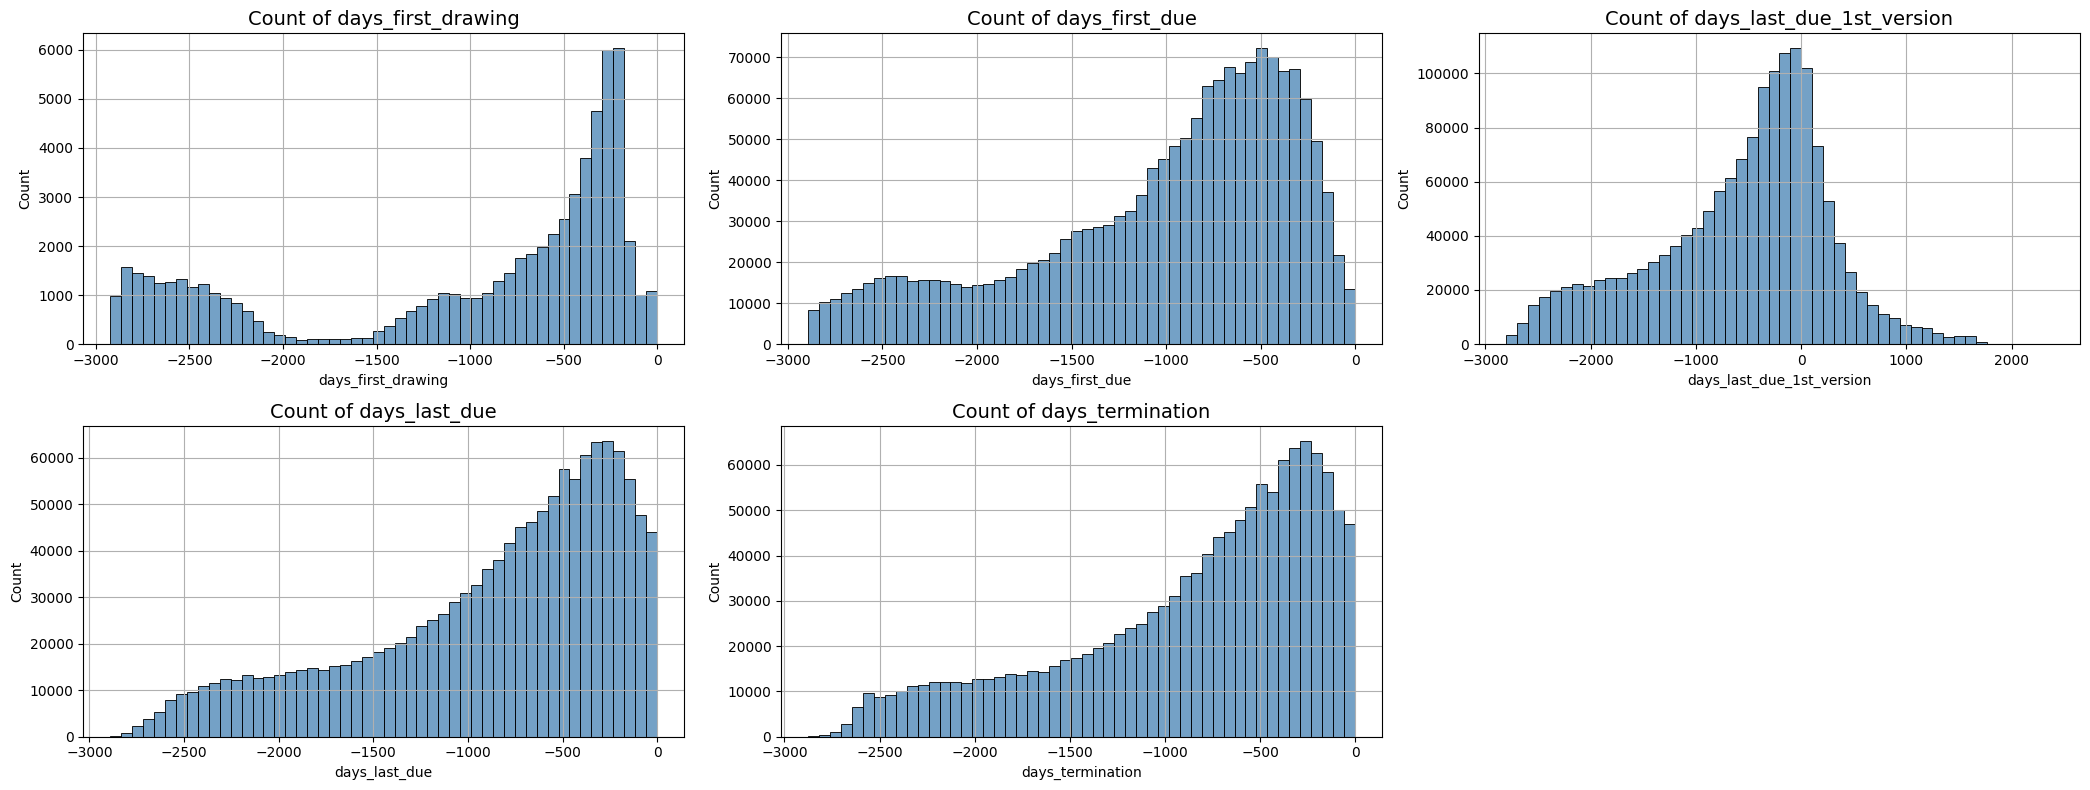

In [57]:
cols_to_clean = [
    "days_first_drawing",
    "days_first_due",
    "days_last_due_1st_version",
    "days_last_due",
    "days_termination",
]

previous_application_df[cols_to_clean] = previous_application_df[cols_to_clean].mask(
    previous_application_df[cols_to_clean] > 5000, np.nan
)

previous_application_df["nflag_insured_on_approval"] = previous_application_df[
    "nflag_insured_on_approval"
].where(previous_application_df["nflag_insured_on_approval"].isin([0, 1]), np.nan)

plot_numeric_distribution(previous_application_df, cols_to_clean)

##### 5.1.3. Outliers

In [58]:
detect_outliers(previous_application_df, previous_numeric)

Outliers detected in 'amt_annuity': 98748
Outliers detected in 'amt_application': 208019
Outliers detected in 'amt_credit': 179989
Outliers detected in 'amt_down_payment': 140145
Outliers detected in 'amt_goods_price': 171230
Outliers detected in 'hour_appr_process_start': 1639
Outliers detected in 'nflag_last_appl_in_day': 5900
Outliers detected in 'rate_down_payment': 69157
Outliers detected in 'rate_interest_primary': 29113
Outliers detected in 'rate_interest_privileged': 21543
Outliers detected in 'days_decision': 17571
Outliers detected in 'sellerplace_area': 268087
Outliers detected in 'cnt_payment': 63568
Outliers detected in 'days_first_drawing': 0
Outliers detected in 'days_first_due': 0
Outliers detected in 'days_last_due_1st_version': 10004
Outliers detected in 'days_last_due': 3467
Outliers detected in 'days_termination': 3410
Outliers detected in 'nflag_insured_on_approval': 0


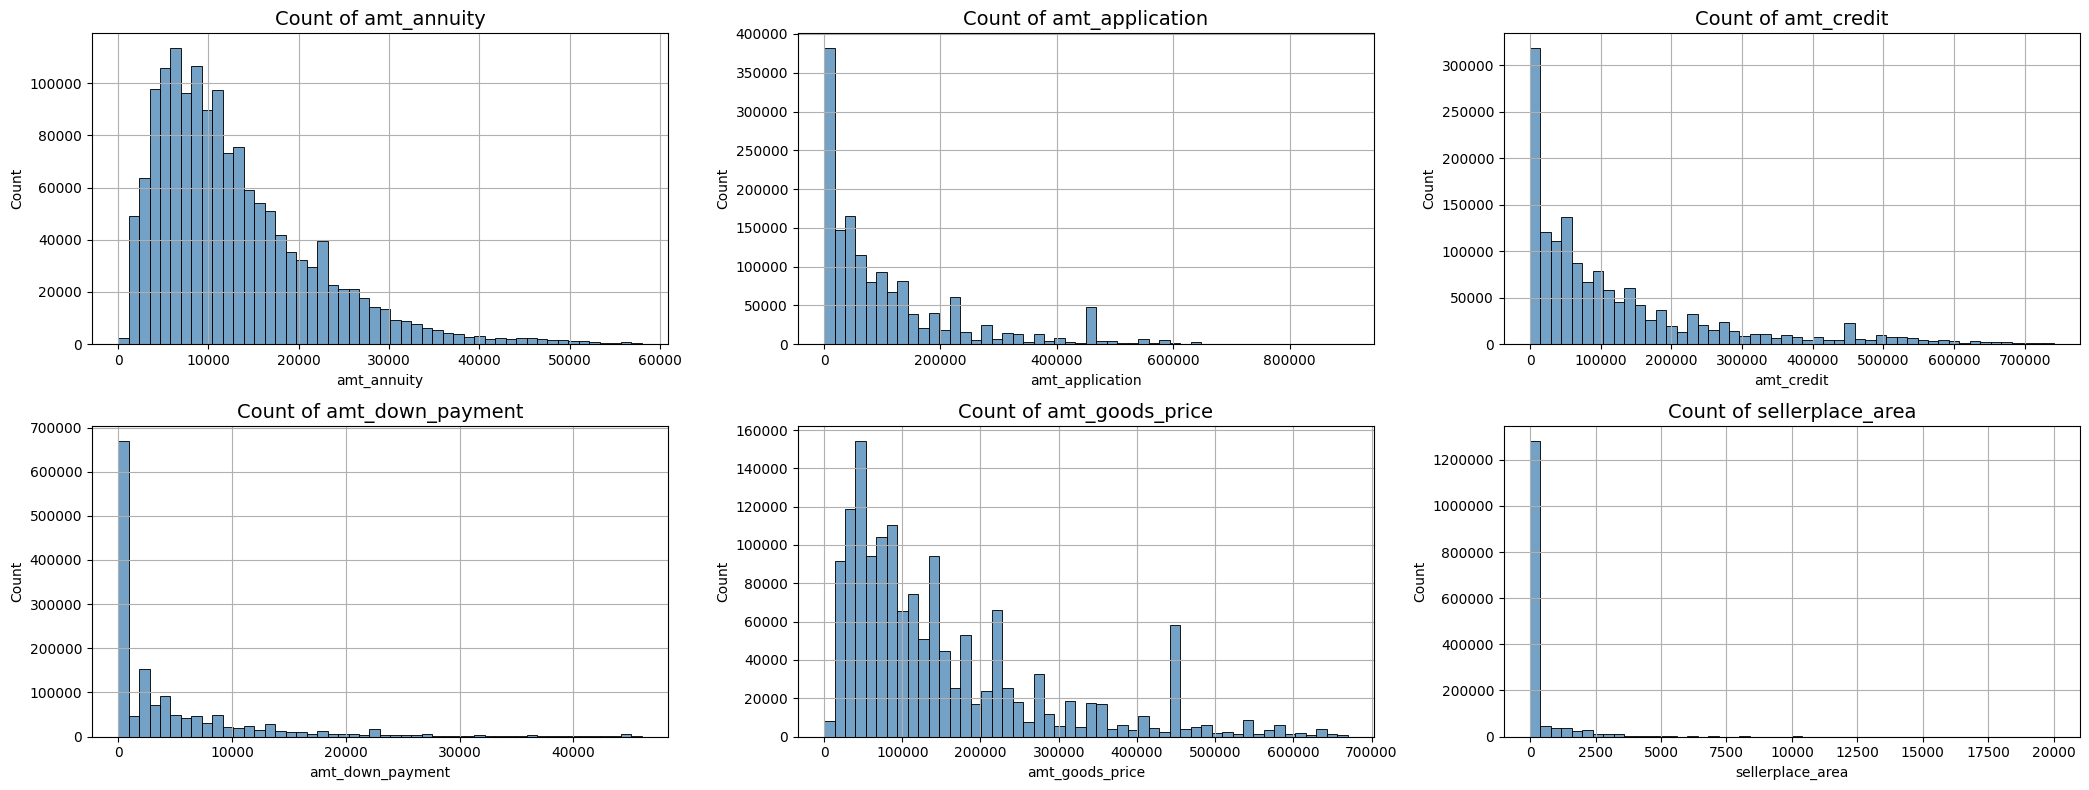

In [59]:
previous_application_df = remove_outliers_by_std(
    previous_application_df,
    [
        "amt_annuity",
        "amt_application",
        "amt_credit",
        "amt_down_payment",
        "amt_goods_price",
        "sellerplace_area",
    ],
)

plot_numeric_distribution(
    previous_application_df,
    [
        "amt_annuity",
        "amt_application",
        "amt_credit",
        "amt_down_payment",
        "amt_goods_price",
        "sellerplace_area",
    ],
)

Most values are on lower end, with amt application, credit and goods price having a bit more variety with small second peak around 450 000.

##### 5.1.4. Converting Days to Months

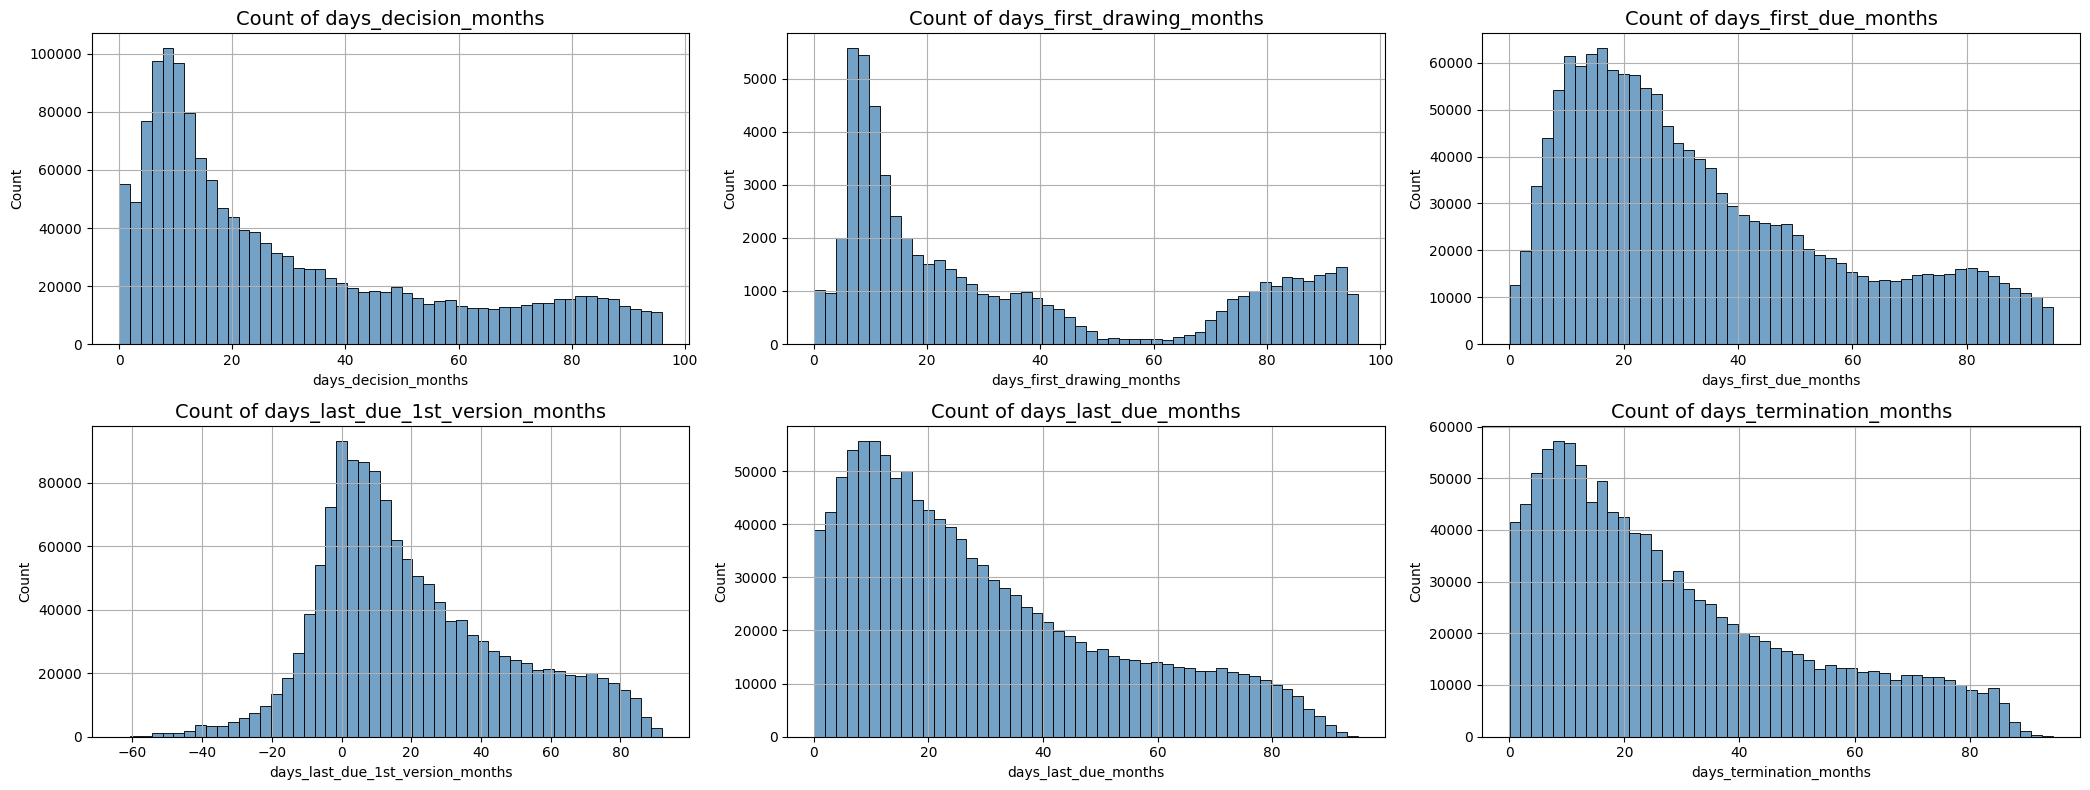

In [60]:
previous_application_df = convert_days_to_months(
    previous_application_df,
    [
        "days_decision",
        "days_first_drawing",
        "days_first_due",
        "days_last_due_1st_version",
        "days_last_due",
        "days_termination",
    ],
)


plot_numeric_distribution(
    previous_application_df,
    [
        "days_decision_months",
        "days_first_drawing_months",
        "days_first_due_months",
        "days_last_due_1st_version_months",
        "days_last_due_months",
        "days_termination_months",
    ],
)

All features have peaks between 0 to 20 months.

#### 5.2. Categorical Features

In [61]:
previous_categorical = [
    col
    for col in previous_application_df.select_dtypes(
        include=["object", "category"]
    ).columns
]

print_unique_counts(previous_application_df, previous_categorical)

name_contract_type: 4 unique values
weekday_appr_process_start: 7 unique values
flag_last_appl_per_contract: 2 unique values
name_cash_loan_purpose: 25 unique values
name_contract_status: 4 unique values
name_payment_type: 4 unique values
code_reject_reason: 9 unique values
name_type_suite: 8 unique values
name_client_type: 4 unique values
name_goods_category: 27 unique values
name_portfolio: 4 unique values
name_product_type: 3 unique values
channel_type: 8 unique values
name_seller_industry: 11 unique values
name_yield_group: 5 unique values
product_combination: 17 unique values


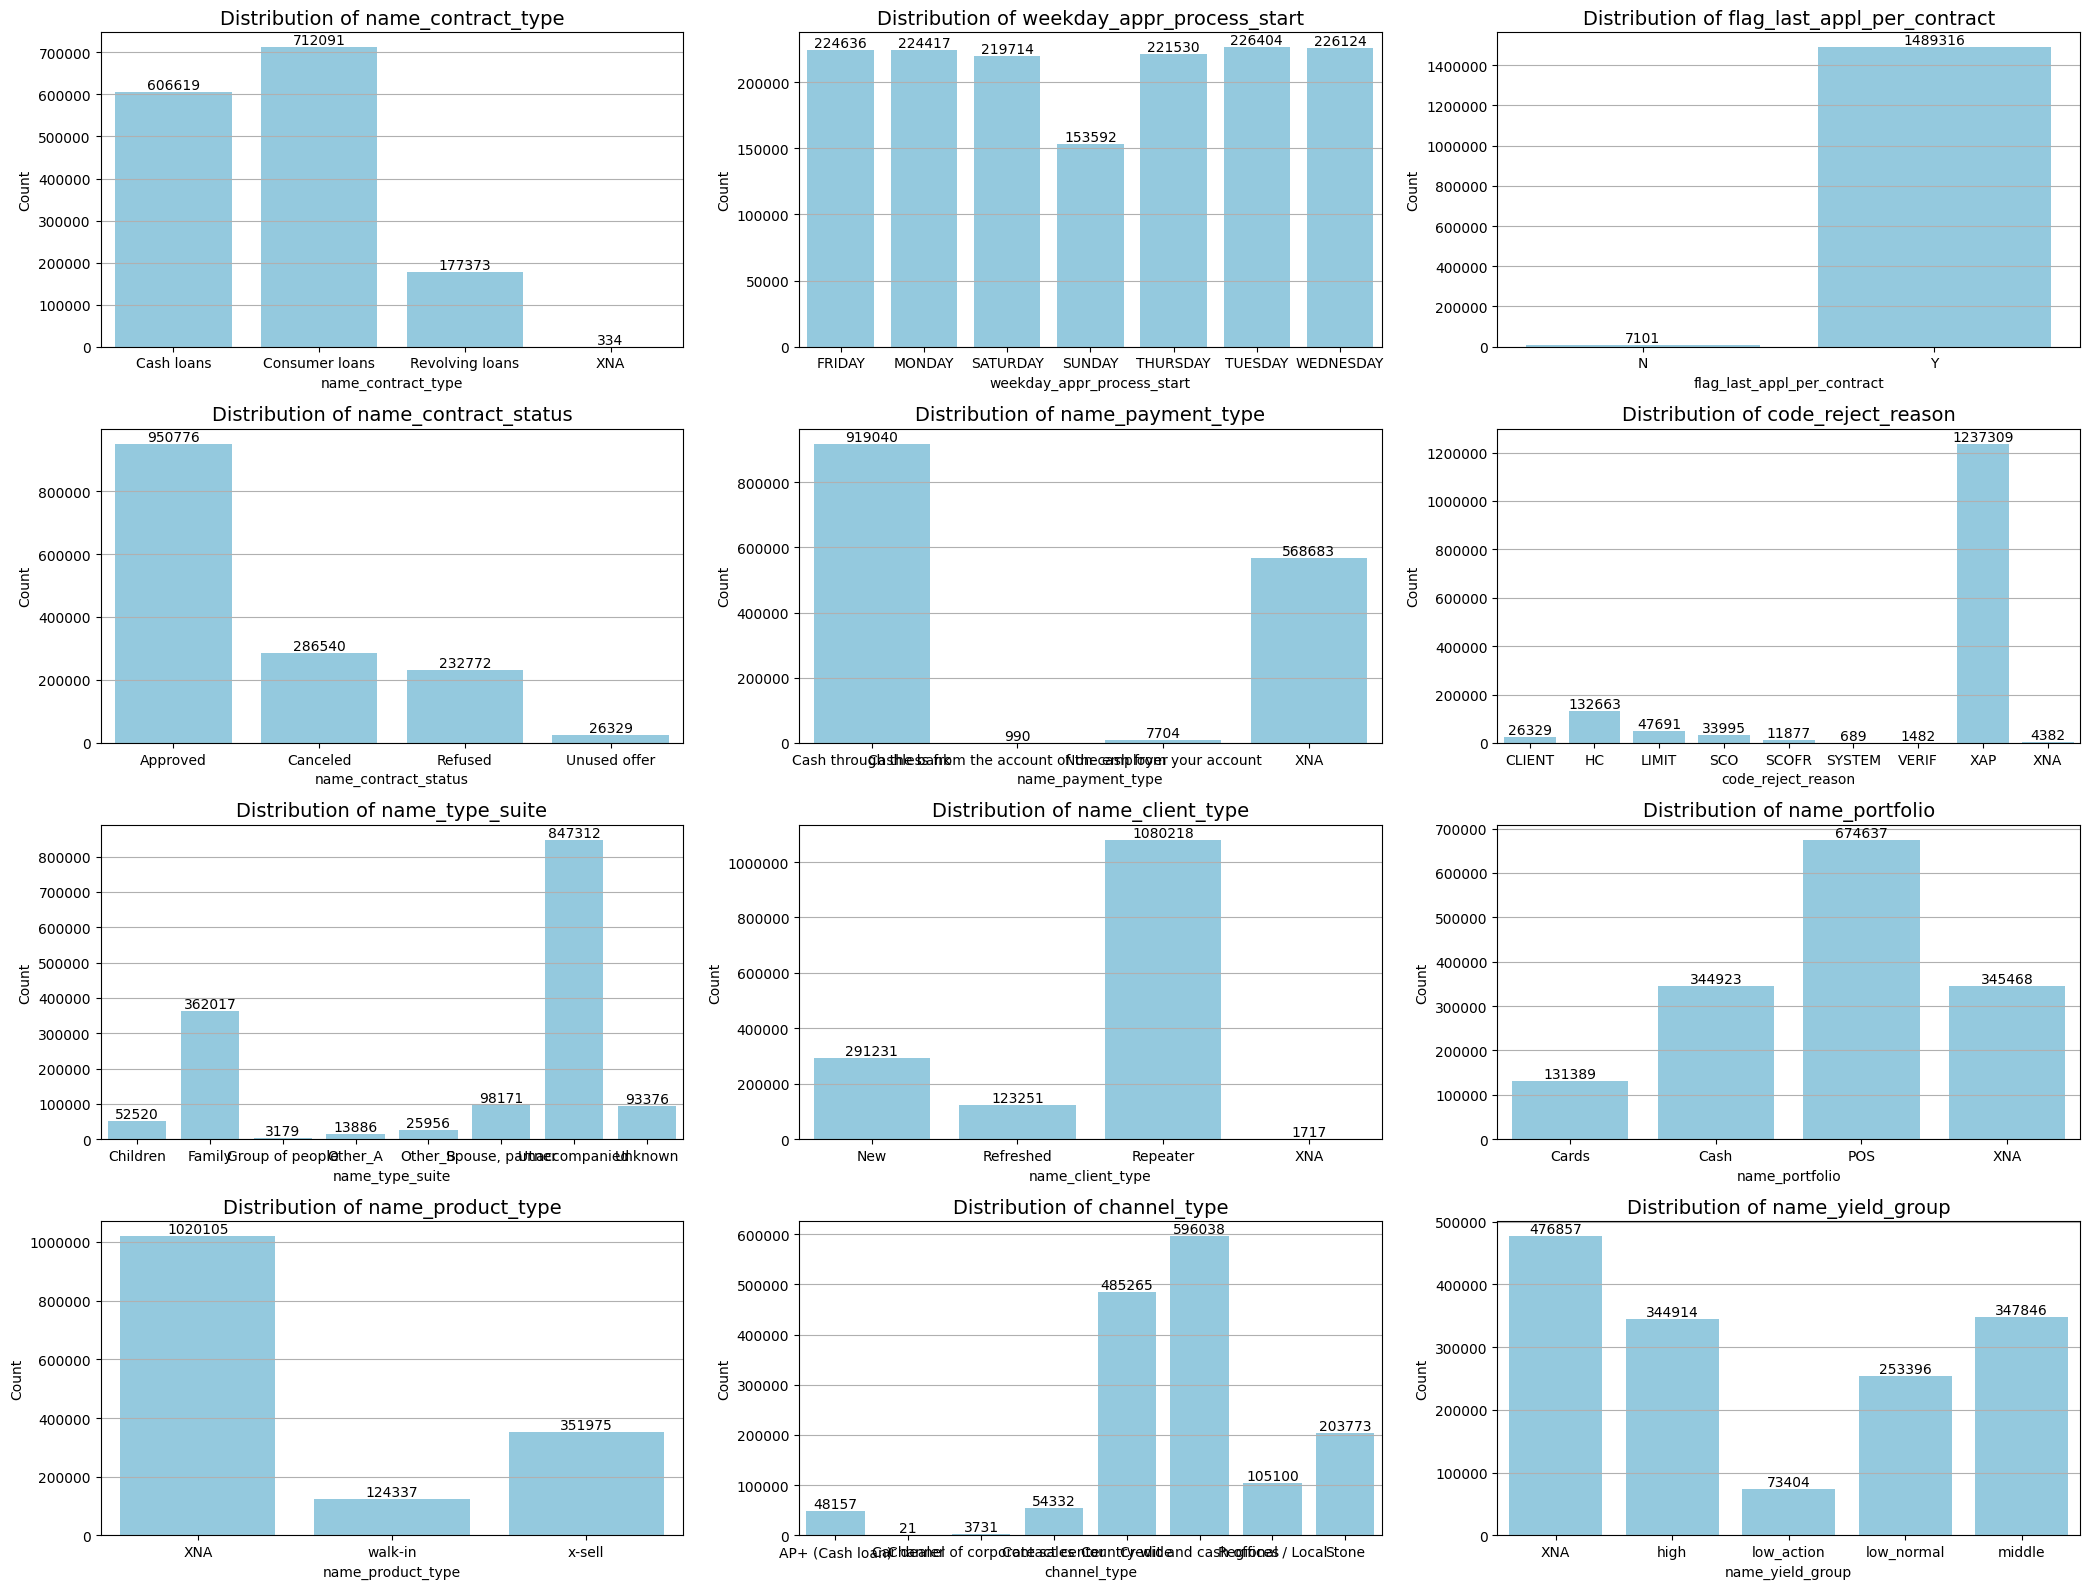

In [62]:
plot_categorical_distribution(
    previous_application_df,
    [
        col
        for col in previous_categorical
        if col
        not in [
            "name_cash_loan_purpose",
            "name_goods_category",
            "name_seller_industry",
            "product_combination",
        ]
    ],
)

* name_contract_type: mostly consumer loan or cash loans.
* weekday_appr_process_start: most weekdays similar, except for sunday which have the least.
* flag_last_appl_per_contract: Most clients yes.
* name_contract_status: most contracts are aproved.
* name_payment_type: mostly cash or unknown.
* code_reject_reason: mostly XAP reason.
* name_type_suite: mostly uncompanied.
* name_client_type: mostly repeater.
* name_portfolio: most PRO.
* name_product_type: most unknown.
* channel_type: 
* name_yield_group: mostly unknown, high and middle highest.

In [63]:
value_counts_rounded(previous_application_df, ["name_cash_loan_purpose"])

name_cash_loan_purpose          
XAP                                 889798
XNA                                 554785
Repairs                              17083
Other                                12564
Urgent needs                          7330
Everyday expenses                     2291
Medicine                              2008
Buying a used car                     1481
Education                             1458
Building a house or an annex          1164
Journey                               1092
Payments on other loans               1030
Purchase of electronic equipment      1014
Wedding / gift / holiday               775
Car repairs                            734
Furniture                              635
Gasification / water supply            234
Buying a new car                       228
Buying a home                          202
Business development                   186
Buying a holiday home / land           178
Buying a garage                         65
Hobby                

Most are XAP and XNA.

In [64]:
value_counts_rounded(previous_application_df, ["name_goods_category"])

name_goods_category     
XNA                         793472
Mobile                      224085
Consumer Electronics        119231
Computers                   103455
Audio/Video                  96945
Furniture                    50848
Photo / Cinema Equipment     24787
Construction Materials       23370
Clothing and Accessories     21527
Auto Accessories              7179
Jewelry                       6129
Homewares                     4772
Medical Supplies              3761
Vehicles                      2913
Sport and Leisure             2840
Other                         2517
Gardening                     2491
Office Appliances             2318
Medicine                      1512
Tourism                       1277
Direct Sales                   433
Fitness                        200
Additional Service             117
Education                       99
Weapon                          75
Insurance                       63
Animals                          1
Name: count, dtype: int64

Most are XNA and mobile.

In [65]:
value_counts_rounded(previous_application_df, ["name_seller_industry"])

name_seller_industry
XNA                     703608
Consumer electronics    387990
Connectivity            274093
Furniture                54447
Construction             27745
Clothing                 21908
Industry                 17872
Auto technology           4616
Jewelry                   2651
MLM partners              1138
Tourism                    349
Name: count, dtype: int64

Most are XNA, consumer electronics and connectivity.

In [66]:
value_counts_rounded(previous_application_df, ["product_combination"])

product_combination           
Cash                              261780
POS household with interest       257065
POS mobile with interest          219973
Cash X-Sell: middle               120972
Card Street                       109104
POS industry with interest         92409
POS household without interest     82035
Cash X-Sell: low                   68747
Card X-Sell                        68361
Cash Street: high                  58954
Cash X-Sell: high                  53960
Cash Street: middle                27555
POS mobile without interest        24051
POS other with interest            22367
Cash Street: low                   14788
POS industry without interest      11774
POS others without interest         2522
Name: count, dtype: int64

Most are cash, POS household with interest and POS mobile with interest.

## Installments Payments Dataset

###  1. Features in dataset

In [67]:
installments_payments_df = pd.read_csv("installments_payments.csv")
installments_payments_df.columns = (
    installments_payments_df.columns.str.strip().str.lower().str.replace(" ", "_")
)
show_head_and_info(installments_payments_df)

Data


,sk_id_prev,sk_id_curr,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585



Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   sk_id_prev              int64  
 1   sk_id_curr              int64  
 2   num_instalment_version  float64
 3   num_instalment_number   int64  
 4   days_instalment         float64
 5   days_entry_payment      float64
 6   amt_instalment          float64
 7   amt_payment             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


13 605 401 observations and 8 features.

### 2. Duplicated clients

In [68]:
count_clients_with_multiple_records(installments_payments_df)

338615

### 3. Missing Values

In [69]:
missing_value_summary(installments_payments_df)

,Missing Count,Missing %
days_entry_payment,2905,0.02
amt_payment,2905,0.02


In [70]:
installments_payments_df = fill_missing_values(
    installments_payments_df, group_col="sk_id_curr"
)

missing_value_summary(installments_payments_df)

,Missing Count,Missing %


### 4. Duplicated Rows

In [71]:
installments_payments_df.duplicated().sum()

0

### 5. Distribution of each feature

#### 5.1. Numeric Features

In [72]:
installments_numeric = [
    col
    for col in installments_payments_df.select_dtypes(include="number").columns
    if col not in ["sk_id_prev", "sk_id_curr"]
]

##### 5.1.1. Distribution

In [73]:
installments_payments_df[installments_numeric].describe().round(2)

,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
count,13605401.00,13605401.00,13605401.00,13605401.00,13605401.00,13605401.00
mean,0.86,18.87,-1042.27,-1051.19,17050.91,17236.56
std,1.04,26.66,800.95,800.60,50570.25,54730.20
min,0.00,1.00,-2922.00,-4921.00,0.00,0.00
25%,0.00,4.00,-1654.00,-1662.00,4226.08,3398.62
50%,1.00,8.00,-818.00,-827.00,8884.08,8125.16
75%,1.00,19.00,-361.00,-370.00,16710.21,16106.36
max,178.00,277.00,-1.00,-1.00,3771487.84,3771487.84


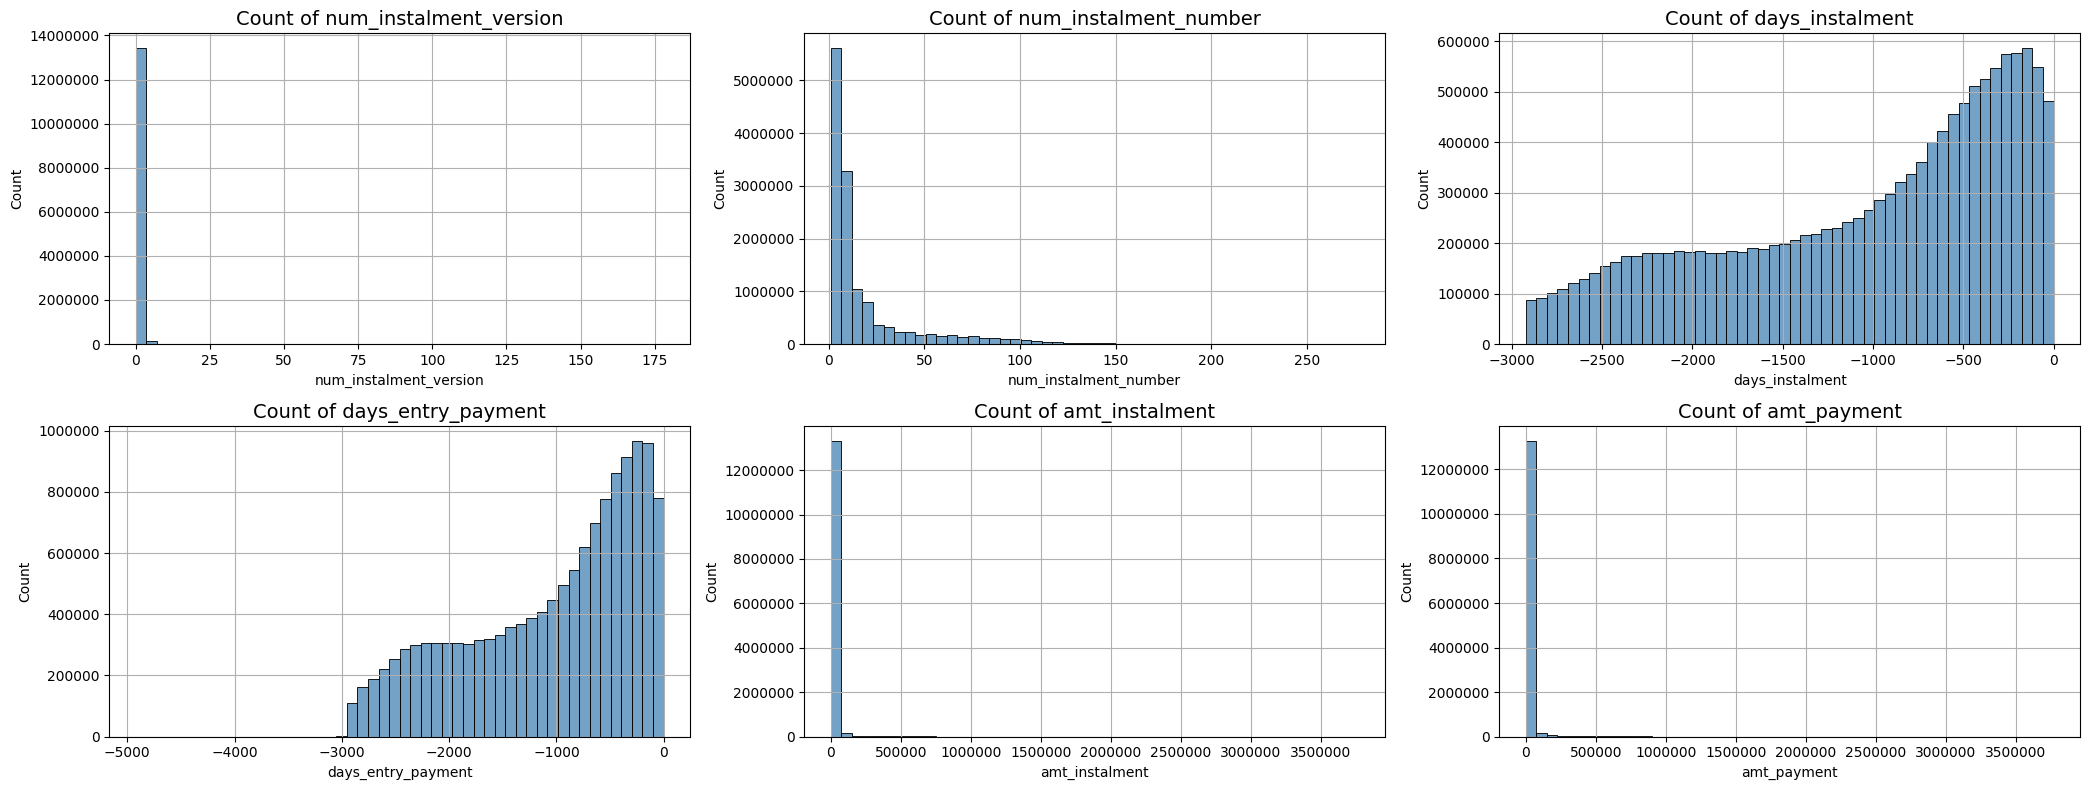

In [74]:
plot_numeric_distribution(installments_payments_df, installments_numeric)

* num_instalment_version: have 417 616 outliers, distribution righ skewed, most are around 0 or 1.
* num_instalment_number: have 1 886 320 outliers, distribution righ skewed, most are around 0 to 50.
* days_instalment: have no outliers, goes from -1 to -2922, most are around -1 to -500
* days_entry_payment: have 1 outlier, goes from -1 to -4921 (which is outlier), most are around -200 to -500
* amt_instalment: have 1 120 800 outliers, goes from 0 to 3771487.84, most are lower values.
* amt_payment: have 1 130 361 outliers, goes from 0 to 3771487.84, sames as amt_instalment most are lower values.

##### 5.1.2. Converting Days to Months

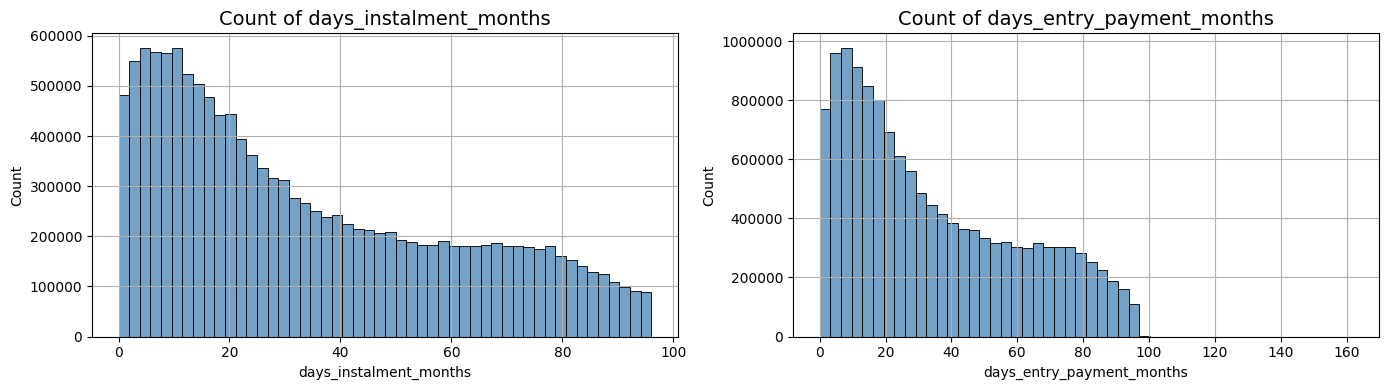

In [75]:
installments_payments_df = convert_days_to_months(
    installments_payments_df, ["days_instalment", "days_entry_payment"]
)

plot_numeric_distribution(
    installments_payments_df, ["days_instalment_months", "days_entry_payment_months"]
)

##### 5.1.3. Outliers

In [76]:
detect_outliers(installments_payments_df, installments_numeric)

Outliers detected in 'num_instalment_version': 417616
Outliers detected in 'num_instalment_number': 1886320
Outliers detected in 'days_instalment': 0
Outliers detected in 'days_entry_payment': 1
Outliers detected in 'amt_instalment': 1120800
Outliers detected in 'amt_payment': 1130361


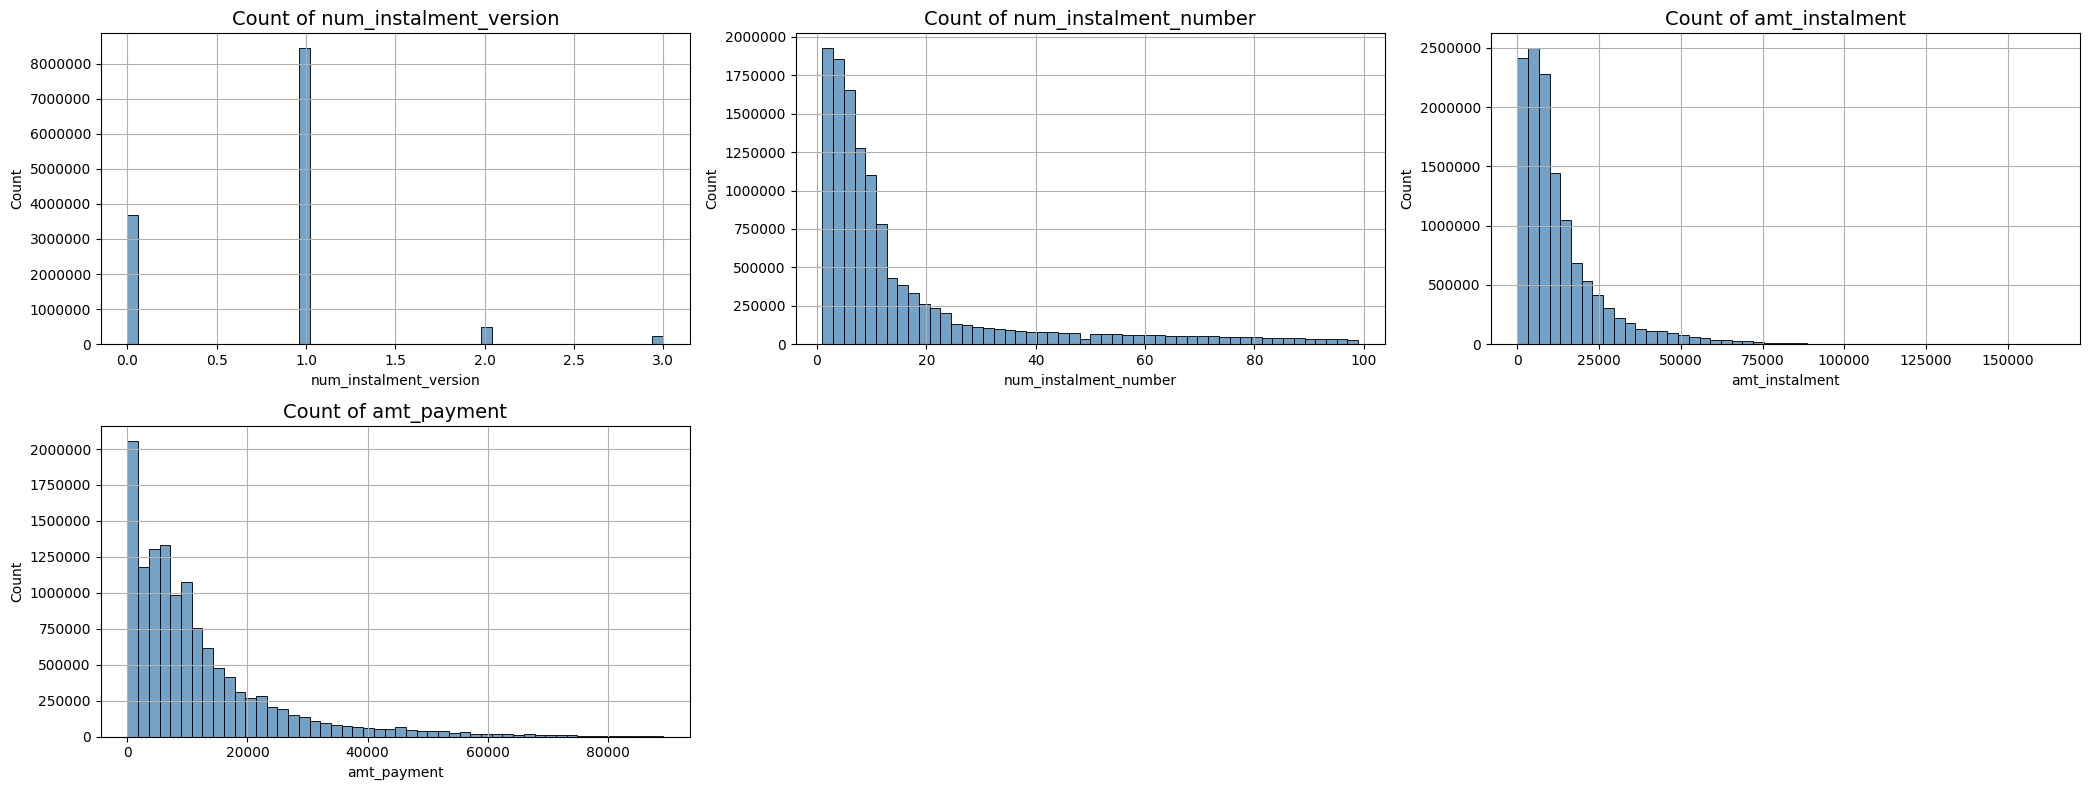

In [77]:
installments_payments_df = remove_outliers_by_std(
    installments_payments_df,
    [
        "num_instalment_version",
        "num_instalment_number",
        "amt_instalment",
        "amt_payment",
    ],
)

plot_numeric_distribution(
    installments_payments_df,
    [
        "num_instalment_version",
        "num_instalment_number",
        "amt_instalment",
        "amt_payment",
    ],
)

* num_instalment_version: mostly 1.
* num_instalment_number: most values are around 0 to 10.
* amt_instalment and amt_payment: most are around 0 to 20 000.

## Merging Datasets

1. Merging bureau and bureau balance by sk_id_bureau
2. Merging the others sk_id_curr
3. Turning to file

### 1. Merging bureau and bureau balance by sk_id_bureau

In [78]:
application_df = aggregate_bureau_with_balance(bureau_df, bureau_balance_df)

### 2. Merging with others

#### 2.1. POS CASH Balance

In [79]:
application_df = aggregate_datasets(application_df, pos_cash_balance_df)

#### 2.2. Credit Card Balance

In [80]:
application_df = aggregate_datasets(application_df, credit_card_balance_df)

#### 2.3. Previous Application

In [81]:
application_df = aggregate_datasets(application_df, previous_application_df)

#### 2.4. Installments Payments

In [82]:
application_df = aggregate_datasets(application_df, installments_payments_df)

### 3. Turning to file

In [83]:
show_head_and_info(application_df)

Data


,sk_id_curr,amt_annuity_x,amt_annuity_y,amt_application,amt_balance,amt_credit,amt_credit_limit_actual,amt_credit_max_overdue,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,amt_down_payment,amt_drawings_atm_current,amt_drawings_current,amt_drawings_other_current,amt_drawings_pos_current,amt_goods_price,amt_inst_min_regularity,amt_instalment,amt_payment,amt_payment_current,amt_payment_total_current,amt_receivable_principal,amt_recivable,amt_total_receivable,cnt_credit_prolong,cnt_drawings_atm_current,cnt_drawings_current,cnt_drawings_other_current,cnt_drawings_pos_current,cnt_instalment,cnt_instalment_future,cnt_instalment_mature_cum,cnt_payment,credit_day_overdue,days_credit,days_credit_enddate,days_credit_enddate_months,days_credit_months,days_credit_update,days_credit_update_months,days_decision,days_decision_months,days_enddate_fact,days_enddate_fact_months,days_entry_payment,days_entry_payment_months,days_first_drawing,days_first_drawing_months,days_first_due,days_first_due_months,days_instalment,days_instalment_months,days_last_due,days_last_due_1st_version,days_last_due_1st_version_months,days_last_due_months,days_termination,days_termination_months,hour_appr_process_start,months_balance,months_balance_x,months_balance_y,nflag_insured_on_approval,nflag_last_appl_in_day,num_instalment_number,num_instalment_version,rate_down_payment,rate_interest_primary,rate_interest_privileged,sellerplace_area,sk_dpd_def_x,sk_dpd_def_y,sk_dpd_x,sk_dpd_y,channel_type,code_reject_reason,credit_active,credit_currency,credit_type,flag_last_appl_per_contract,name_cash_loan_purpose,name_client_type,name_contract_status,name_contract_status_x,name_contract_status_y,name_contract_type,name_goods_category,name_payment_type,name_portfolio,name_product_type,name_seller_industry,name_type_suite,name_yield_group,product_combination,status,weekday_appr_process_start
0,100001,1236.244186,3951.000,24835.50,NaN,23787.00,NaN,0.000000,161516.250000,23893.770349,0.000000,0.0,2520.0,NaN,NaN,NaN,NaN,24835.5,NaN,5885.132143,5885.132143,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4.000000,1.444444,NaN,8.0,0.0,-1009.284884,-456.029070,15.009302,33.165116,-127.651163,4.198256,-1740.0,57.2,-872.436047,28.663372,-2195.000000,72.085714,NaN,NaN,-1709.0,56.1,-2187.714286,71.871429,-1619.0,-1499.0,49.2,53.2,-1612.0,53.0,13.0,NaN,-16.279070,-72.555556,0.0,1.0,2.714286,1.142857,0.104326,0.189122,0.835095,23.0,0.777778,NaN,0.777778,NaN,Country-wide,XAP,Closed,currency 1,Consumer credit,Y,XAP,Refreshed,Approved,Active,<NA>,Consumer loans,Mobile,Cash through the bank,POS,XNA,Connectivity,Family,high,POS mobile with interest,C,FRIDAY
1,100002,0.000000,9251.775,179055.00,NaN,179055.00,NaN,687.814364,111388.838727,35749.963636,1163.220545,0.0,0.0,NaN,NaN,NaN,NaN,179055.0,NaN,11559.247105,11559.247105,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.000000,15.000000,NaN,24.0,0.0,-996.781818,-447.654545,14.700000,32.745455,-631.963636,20.750909,-606.0,19.9,-832.145455,27.329091,-315.421053,10.373684,NaN,NaN,-565.0,18.6,-295.000000,9.689474,-25.0,125.0,-4.1,0.8,-17.0,0.6,9.0,NaN,-24.554545,-10.000000,0.0,1.0,10.000000,1.052632,0.000000,0.189122,0.835095,500.0,0.000000,NaN,0.000000,NaN,Stone,XAP,Closed,currency 1,Credit card,Y,XAP,New,Approved,Active,<NA>,Consumer loans,Vehicles,XNA,POS,XNA,Auto technology,Unknown,low_normal,POS other with interest,0,SATURDAY
2,100003,0.000000,6737.310,68809.50,NaN,68053.50,NaN,0.000000,69133.500000,0.000000,0.000000,0.0,6885.0,NaN,NaN,NaN,NaN,68809.5,NaN,25993.740000,25993.740000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,10.107143,5.785714,NaN,12.0,0.0,-1665.666667,-1131.333333,37.166667,54.733333,-1073.666667,35.266667,-2341.0,76.9,-1097.333333,36.033333,-1678.888889,55.138889,NaN,NaN,-2310.0,75.9,-1670.666667,54.877778,-1980.0,-1980.0,65.0,65.0,-1976.0,64.9,15.0,NaN,NaN,-43.785714,1.0,1.0,5.500000,1.000000,0.100061,0.189122,0.835095,200.0,0.000000,NaN,0.000000,NaN,Country-wide,XAP,Closed,currency 1,Consumer credit,Y,XAP,Refr


Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300550 entries, 0 to 300549
Data columns (total 98 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   sk_id_curr                        300550 non-null  int64  
 1   amt_annuity_x                     300550 non-null  float64
 2   amt_annuity_y                     281635 non-null  float64
 3   amt_application                   281635 non-null  float64
 4   amt_balance                       80976 non-null   float64
 5   amt_credit                        281635 non-null  float64
 6   amt_credit_limit_actual           80976 non-null   float64
 7   amt_credit_max_overdue            300550 non-null  float64
 8   amt_credit_sum                    300550 non-null  float64
 9   amt_credit_sum_debt               300550 non-null  float64
 10  amt_credit_sum_limit              300550 non-null  float64
 11  amt_credit_sum_overdue            300550 non-n

In [84]:
application_df.to_pickle("other_datasets.pkl")